# **Marketing Campaign Analysis**

##**Executive Summary**

In the pursuit of optimizing marketing strategies through customer segmentation, this project employed Unsupervised Learning techniques, specifically Dimensionality Reduction and Clustering. The overarching goal was to unveil latent patterns and similarities among customers, allowing for a more nuanced approach to marketing strategy.

The exploration addressed fundamental questions, including the enhancement of Return on Investment (ROI) through customer segmentation, the role of segmentation in augmenting email engagement, and the comparative analysis of segmented versus non-segmented campaigns in terms of clicks and revenue growth.

This study delves into the identification of key variables in marketing analytics for segmentation and the contribution of Unsupervised Learning techniques, such as Dimensionality Reduction and Clustering, to optimize customer segments for our go-to-market team's revenue cycle.

###**Problem and Solution Summary**

In evaluating various clustering techniques, each method offered unique insights. K-Means demonstrated its efficacy in delineating clusters with distinct spending patterns and engagement levels, while K-Medoids, similar to K-Means, presented robustness to outliers. Hierarchical Clustering, with its ability to capture hierarchical relationships and provide a visual representation through a dendrogram, showcased its utility. Gaussian Mixture Model (GMM) emerged as a powerful tool for capturing complex relationships among data points, leveraging probabilistic assignments for nuanced insights.

The relative performance of these techniques hinges on the specific characteristics of the data. K-Means and K-Medoids prove effective for well-separated clusters, while GMM excels in scenarios where probabilistic assignments are critical. Hierarchical Clustering is particularly useful for understanding hierarchical relationships within the data.

There exists ample room for improvement through experimentation with different metrics, linkage methods, and cluster initialization strategies. Feature engineering, additional data preprocessing, and the application of ensemble techniques could further enhance cluster separation. The insights derived from the clustering analysis, commonalities observed across models, and distinctions between techniques underscore the need for a refined and dynamic approach to customer segmentation.

In proposing a final solution design, the choice between GMM and K-Means depends on factors such as interpretability and the need for probabilistic assignments. While GMM offers nuanced understanding with probabilistic cluster assignments, K-Means provides simplicity and interpretability, making it suitable for well-separated clusters. Fine-tuning hyperparameters is recommended to optimize model performance.

## **Data Dictionary**

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** We can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pwd

/content


In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.8 MB/s eta 0:00:00


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## **Data Overview**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MIT/Capstone Project/marketing_campaign.csv")

In [ ]:
# Reviewing shape and contents of data -- first five rows
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [ ]:
# Last five rows
data.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

In [ ]:
# Checking for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data  = data.drop('ID', axis = 1)

**Observations and Insights from the Data overview:**
- There are 2240 rows (2203 after dropping 'ID'), 27 columns (26 after dropping 'ID).
- 24 null values from Income column.
- No duplicates in this dataframe.
- Majority of variables are integers (23), with only 3 objects and 1 float variable.

We can drop the ID column because it only serves the purpose of mapping customers to their engagement data, which won't enhance our prediction model or the statistical analysis preceding the prediction.

## **Exploratory Data Analysis (EDA)**


In [ ]:
# Getting statistical summary of the data
data.describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.012946      0.113069     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0

In [ ]:
# Creating new dataset to work with
df = data.copy()

In [ ]:
# Pulling categorical columns
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

# Reviewing unique values in categorical variables to understand what values are being used to categorize the data
for column in cols:
    print("Unique values in", column, "are:")
    print(df[column].unique())
    print("*" * 50)

Unique values in Education are:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
**************************************************
Unique values in Marital_Status are:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
**************************************************
Unique values in Kidhome are:
[0 1 2]
**************************************************
Unique values in Teenhome are:
[0 1 2]
**************************************************
Unique values in Complain are:
[0 1]
**************************************************


In [ ]:
# Noticed that some categories can be combined, so I will combine them in Education first
df['Education'].replace('2n Cycle', 'Master', inplace = True)

In [ ]:
# Then , I will replace the redundant values in Marital_Status
df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single', inplace = True)

In [ ]:
# Validating whether those categories have changed
for column in cols:
    print("Unique values in", column, "are:")
    print(df[column].unique())
    print("*" * 50)

Unique values in Education are:
['Graduation' 'PhD' 'Master' 'Basic']
**************************************************
Unique values in Marital_Status are:
['Single' 'Together' 'Married' 'Divorced' 'Widow']
**************************************************
Unique values in Kidhome are:
[0 1 2]
**************************************************
Unique values in Teenhome are:
[0 1 2]
**************************************************
Unique values in Complain are:
[0 1]
**************************************************


### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

In [ ]:
# Grouping numeric columns for univariate analysis (excluding any columns that would cause an error or wouldn't be relevant to this type of analysis)
num_cols = df.drop(['Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp1',
                    'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Teenhome', 'Kidhome'], axis = 1)

Year_Birth
Skew: -0.35


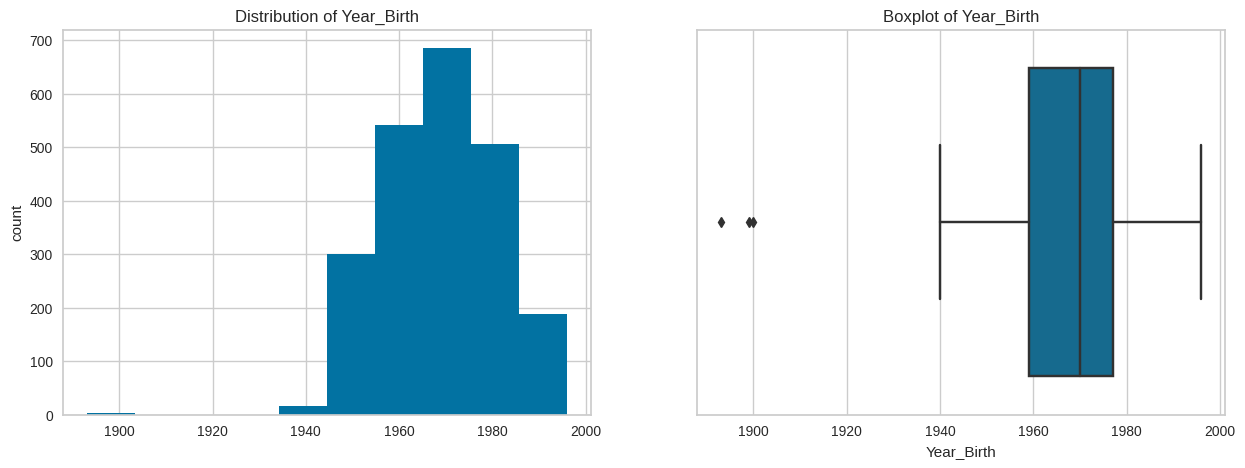

Income
Skew: 6.76


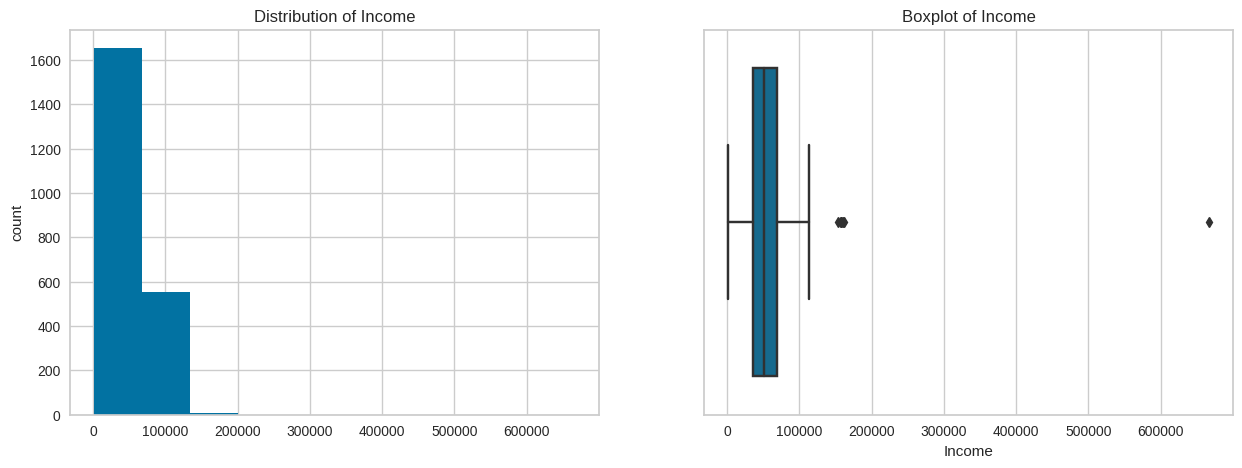

Recency
Skew: -0.0


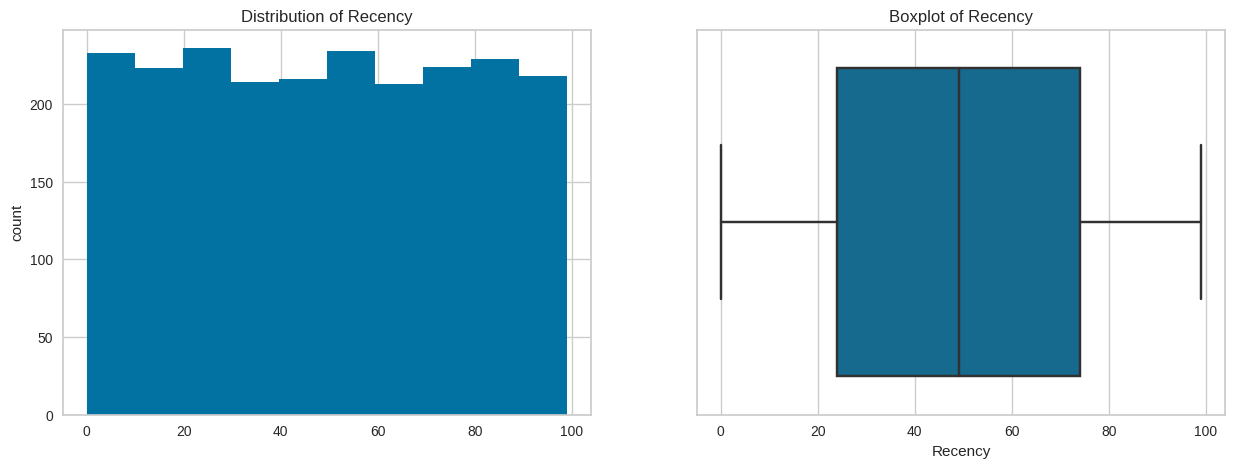

MntWines
Skew: 1.18


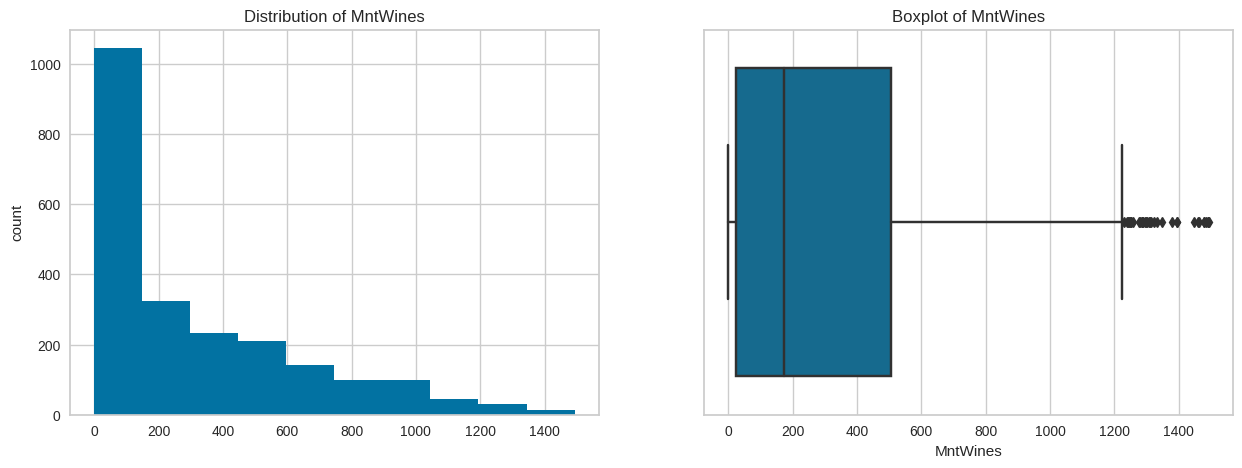

MntFruits
Skew: 2.1


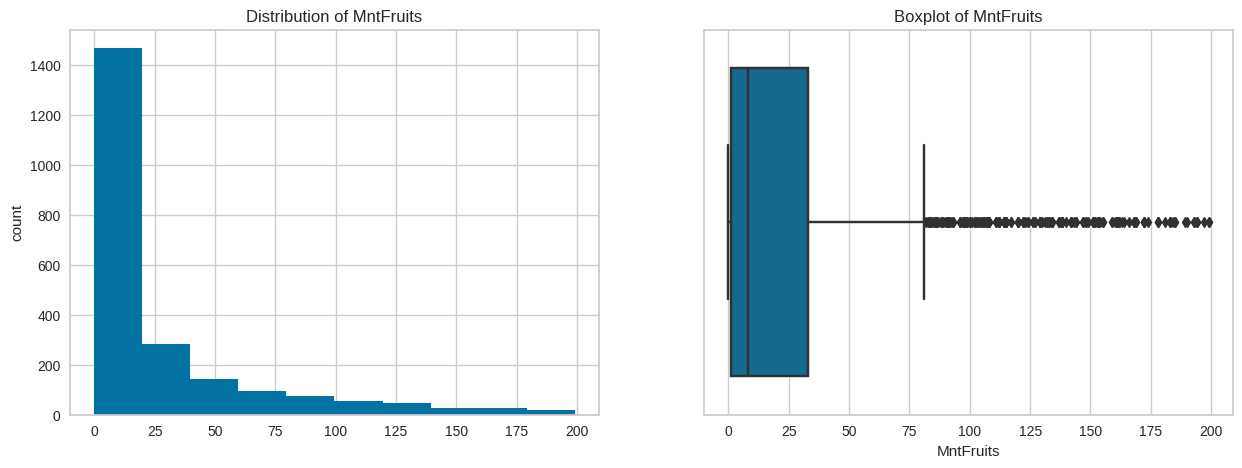

MntMeatProducts
Skew: 2.08


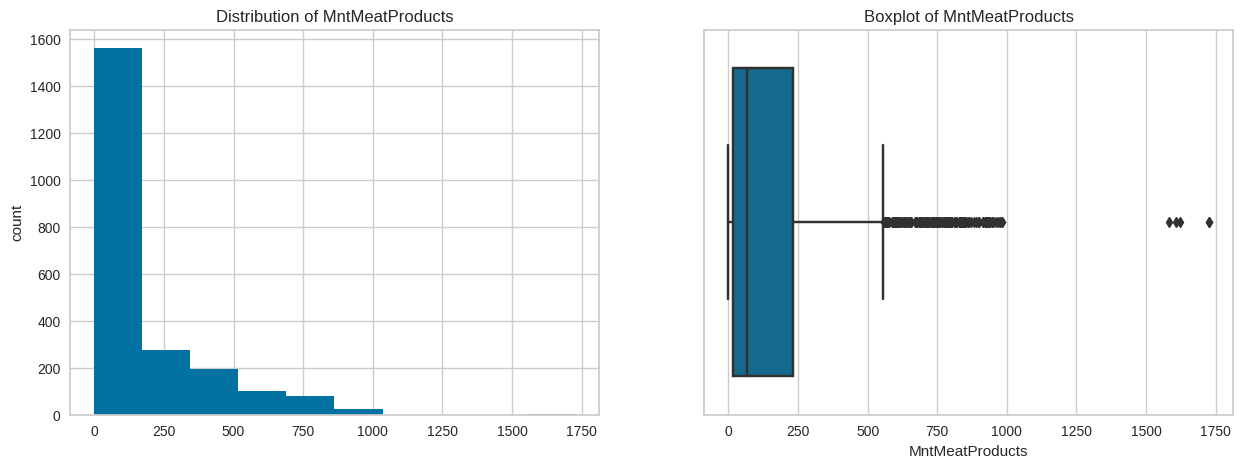

MntFishProducts
Skew: 1.92


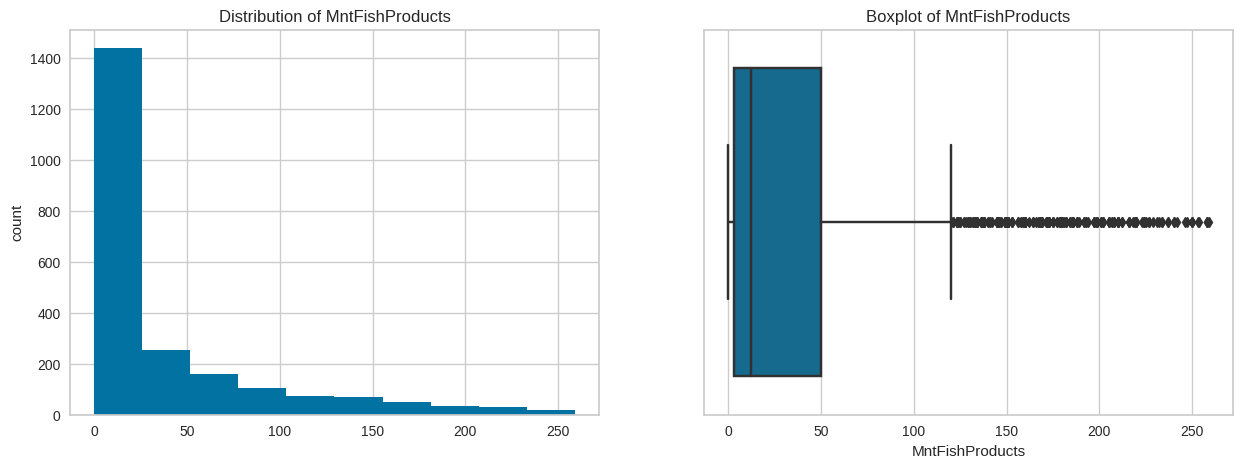

MntSweetProducts
Skew: 2.14


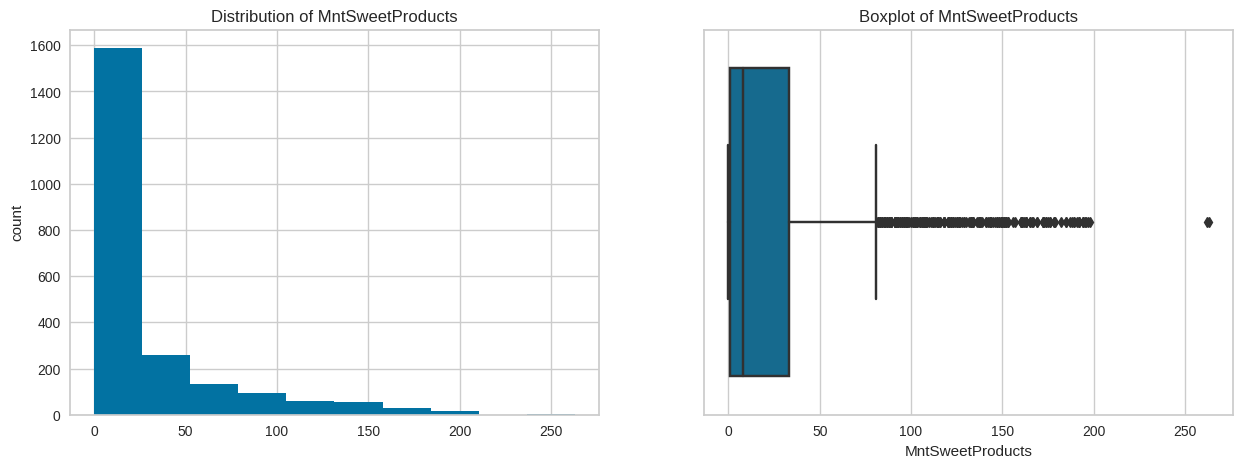

MntGoldProds
Skew: 1.89


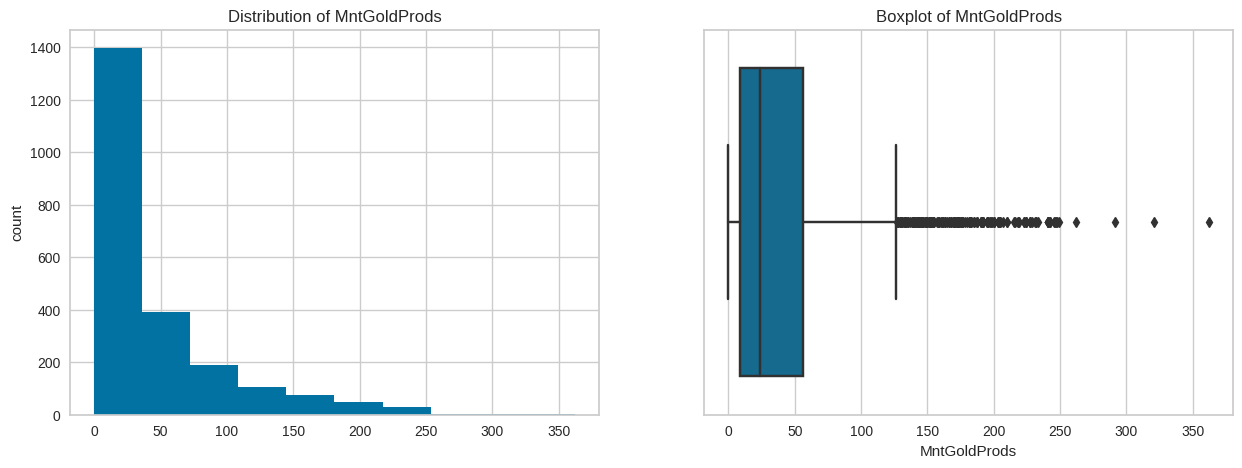

NumDealsPurchases
Skew: 2.42


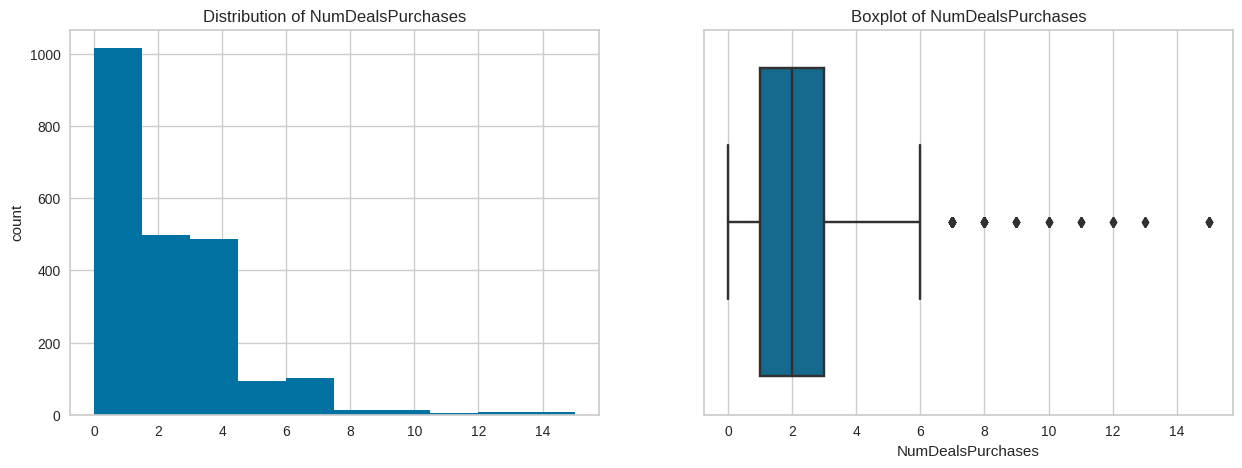

NumWebPurchases
Skew: 1.38


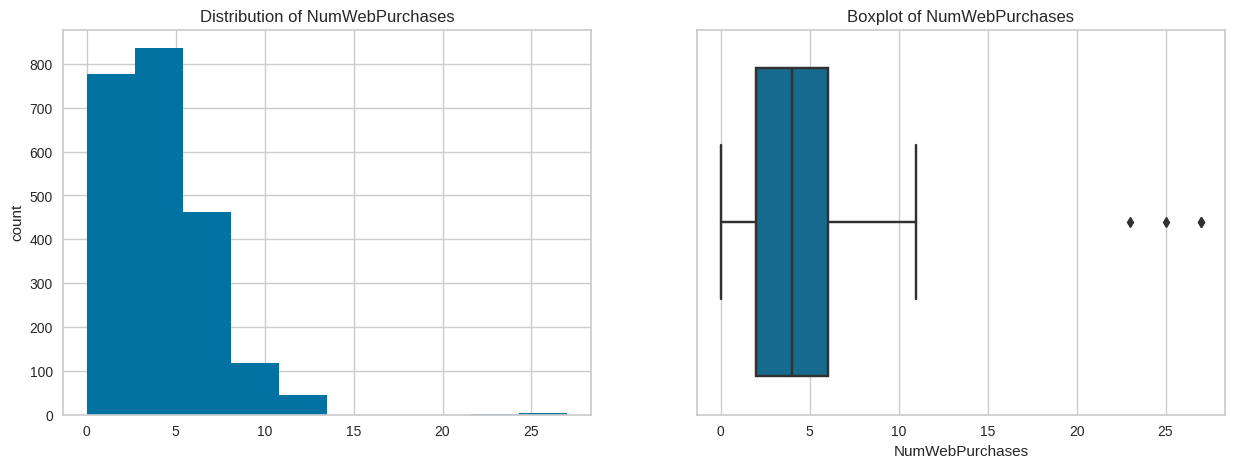

NumCatalogPurchases
Skew: 1.88


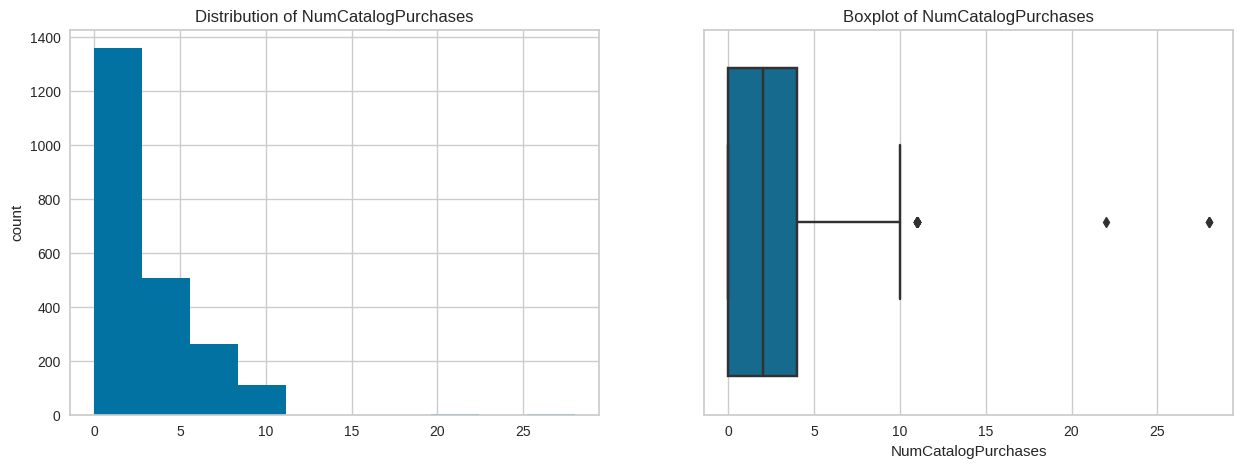

NumStorePurchases
Skew: 0.7


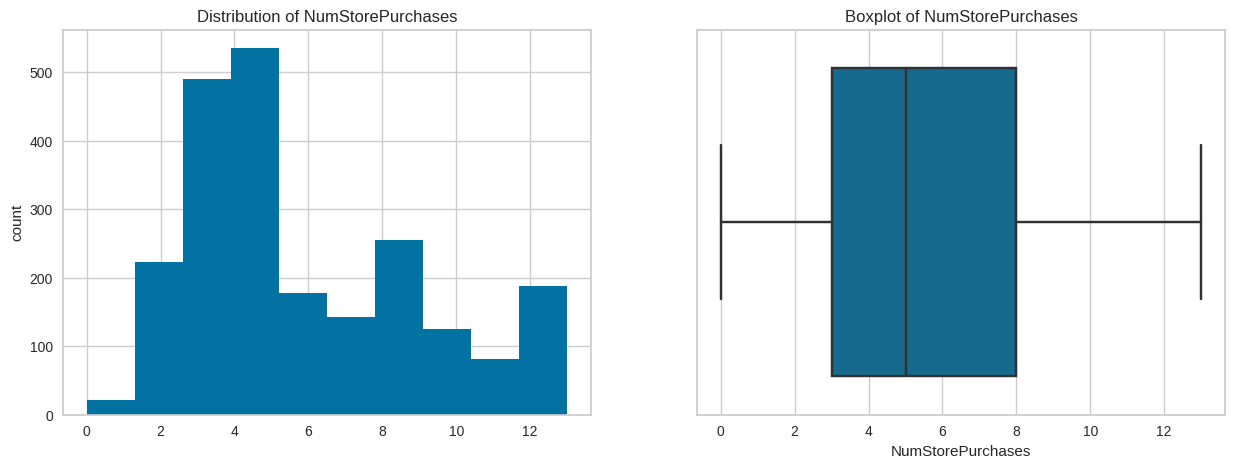

NumWebVisitsMonth
Skew: 0.21


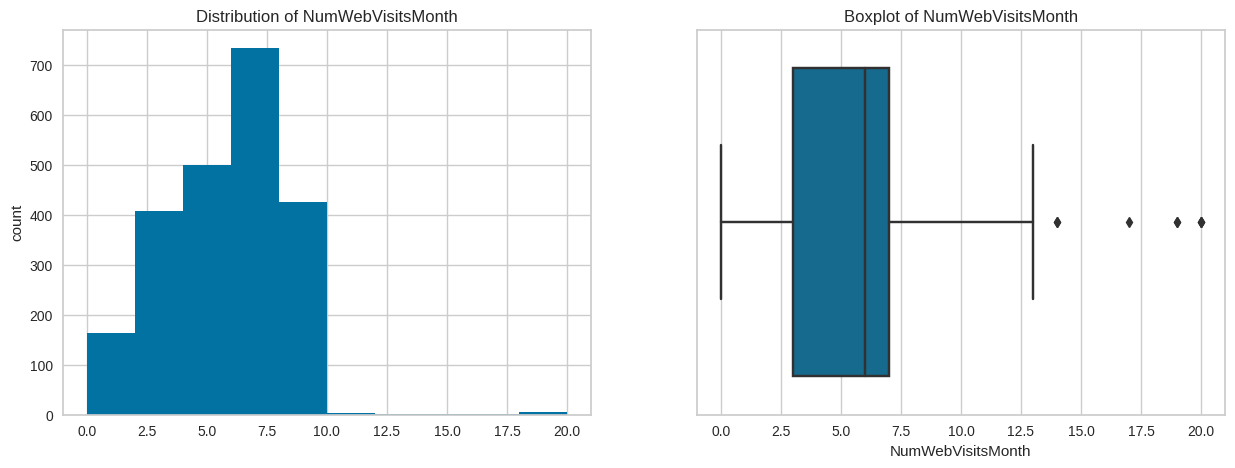

In [ ]:
# Boxplot and histogram for numeric dataframe
for col in num_cols:
    print(col)

    print('Skew:', round(num_cols[col].skew(), 2))

    plt.figure(figsize = (15, 5))

    plt.subplot(1, 2, 1)

    num_cols[col].hist()
    plt.title(f'Distribution of {col}')
    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = num_cols[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

**Plot Takeaways**: Sales numbers contain outliers, but there are so many of them that treating them by removal will impact the bottom line and predictive accuracy of the model.

We can, however, remove the outliers from the Income column, as only a handful of values would be impacted, which will likely remove outlier values in other columns as well -- assuming there is a positive correlative between income and the amount of a product bought.

This can be performed below on the 'df' dataframe.

In [ ]:
# First, we establish whiskers
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR
print(Lower_Whisker, Upper_Whisker)

35303.0
68522.0
33219.0
-14525.5 118350.5


In [ ]:
# Next, we can remove the outliers
df = df[df['Income']< Upper_Whisker]

In [ ]:
# Checking to confirm removal
df['Income'].max()

113734.0

### **Bivariate Analysis**

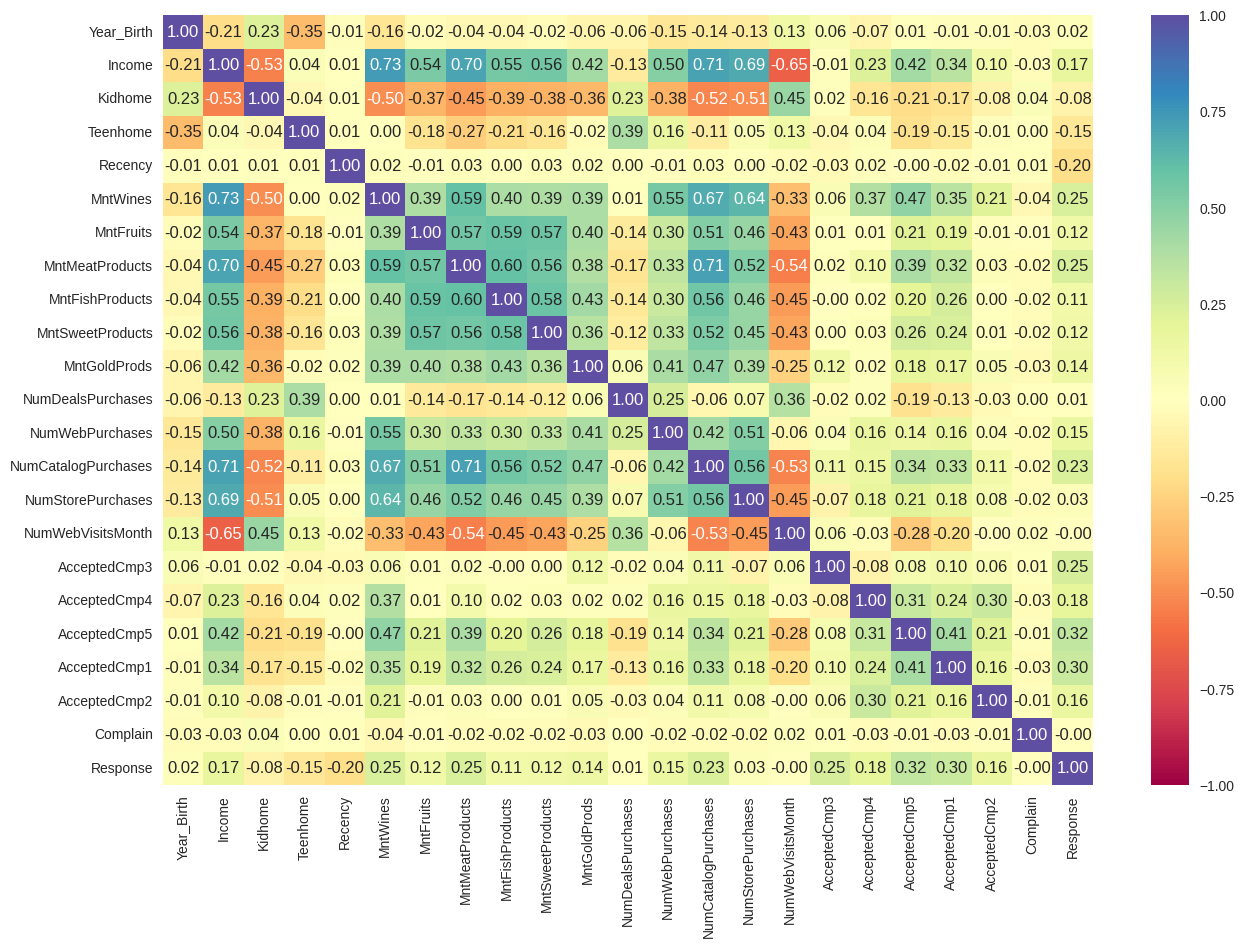

In [ ]:
# We can kick off multivariate analysis by finding out how or if each feature is related
df_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 10))

sns.heatmap(df[df_list].corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

plt.show()

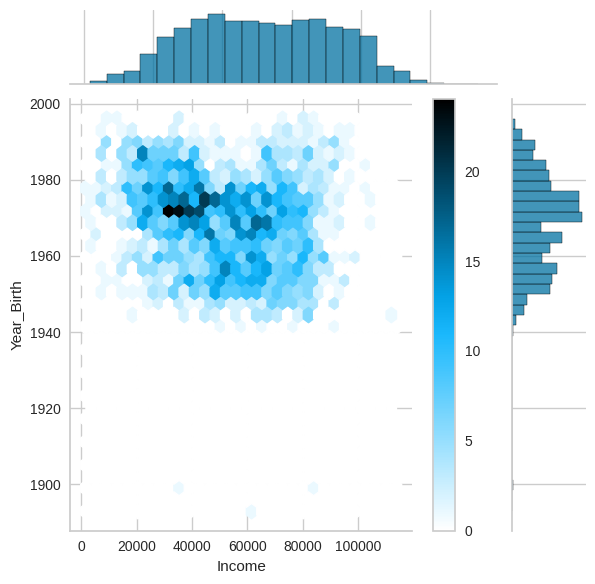

In [ ]:
# Observing income to age relationship
sns.jointplot(data = df, x = 'Income', y = 'Year_Birth', kind = "hex");
plt.colorbar()

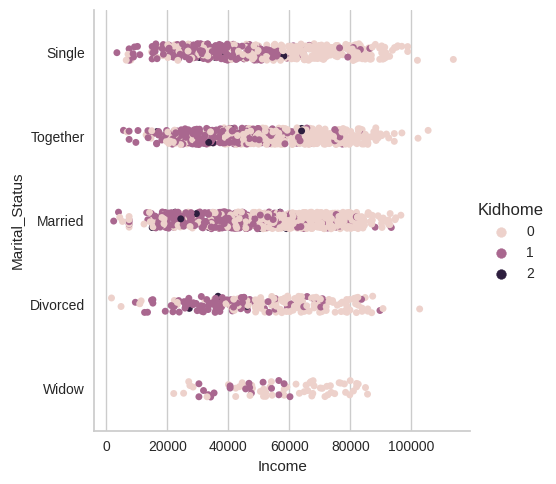

In [ ]:
# Marital status and kids to income ratio
sns.catplot(data = df, x = 'Income', y = 'Marital_Status', hue = 'Kidhome')

<Axes: xlabel='Marital_Status', ylabel='Count'>

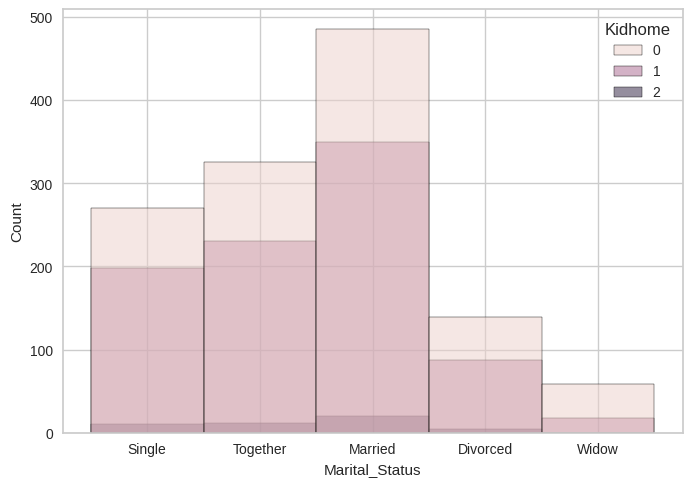

In [ ]:
# Marital status to child parenthood ratio
sns.histplot(data = df, x = 'Marital_Status', hue = 'Kidhome')

<Axes: xlabel='Marital_Status', ylabel='Count'>

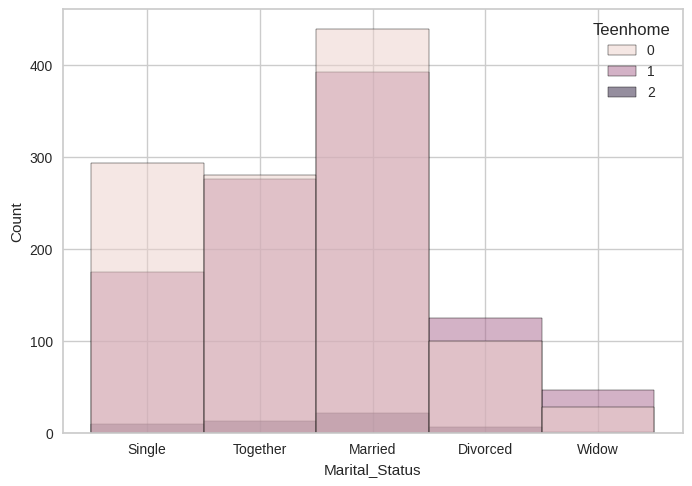

In [ ]:
# Marital status to teen parenthood ratio
sns.histplot(data = df, x = 'Marital_Status', hue = 'Teenhome')

<Axes: xlabel='Income', ylabel='Year_Birth'>

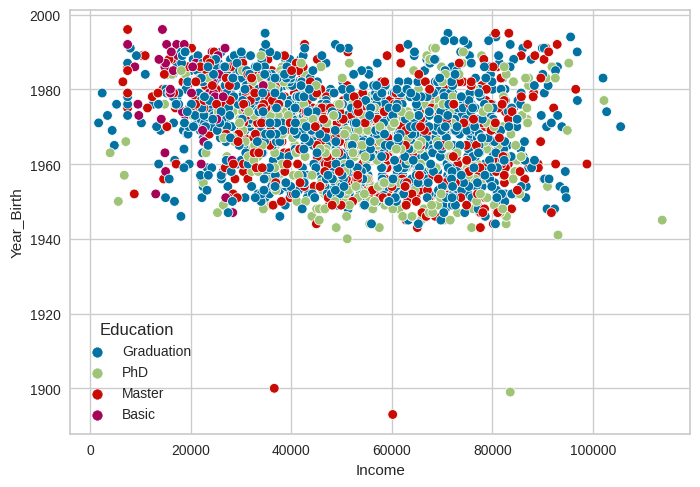

In [ ]:
# Education levels for varied ages and income levels
sns.scatterplot(data = df, x = 'Income', y = 'Year_Birth', hue = 'Education')

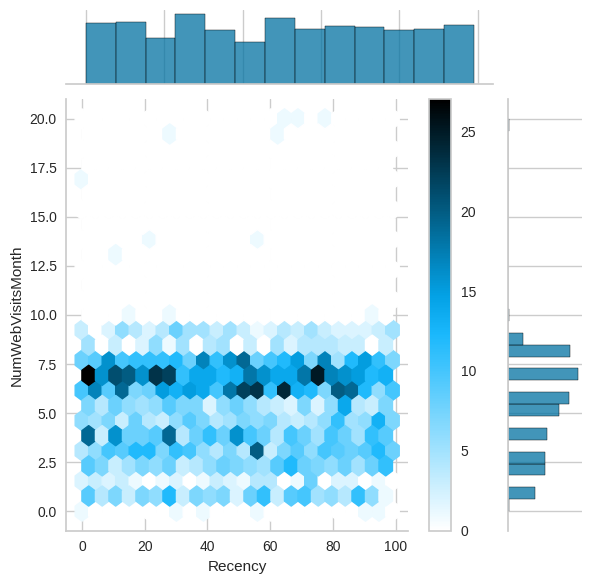

In [ ]:
# Observation relationship between how often people visit and whether they've bought recently
sns.jointplot(data = df, x = 'Recency', y = 'NumWebVisitsMonth', kind = "hex");
plt.colorbar()

### **Feature Engineering and Data Processing**

The purpose of this section is to determine which features can be combined or recalculated to drive model efficiency while removing reduncancies in the data.

In [ ]:
# First, we will turn these dates into ages -- we'll need a new column for that
df['Age'] = ''

In [ ]:
# Now, we can impute age based on a calculation from the Year_Birth column
df['Age'] = 2016 - pd.to_datetime(df['Year_Birth'], format = "%Y").apply(lambda x: x.year)

In [ ]:
# Checking age values
df['Age'].head(5)

0    59
1    62
2    51
3    32
4    35
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

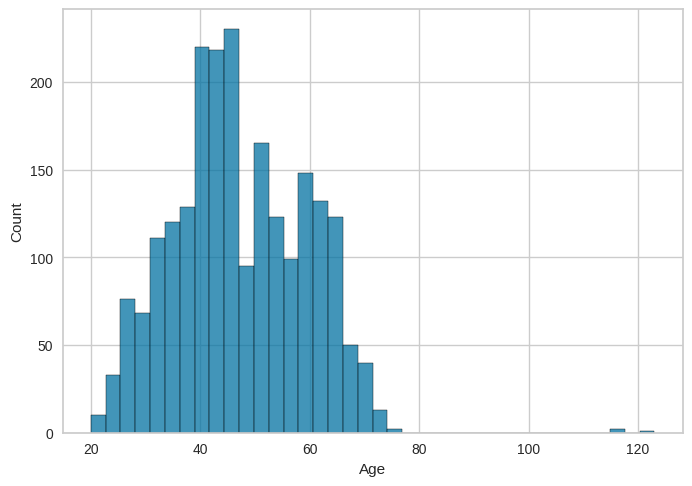

In [ ]:
# Next, we'll review the distribution of age variables
sns.histplot(data = df, x = 'Age') # There appears to be significant outliers that will need to be removed

<Axes: xlabel='Age', ylabel='Count'>

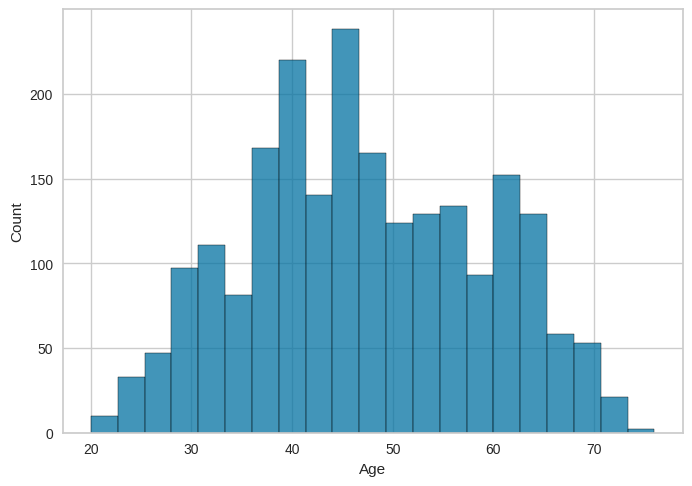

In [ ]:
# Removing outliers then checking again
df = df[df['Age']< 80]

sns.histplot(data = df, x = 'Age')

In order to derive the most categorical value from our demographic data, we'll need to consolidate relationship statuses and family structures, as they will enable us to better understand how those categorical values relate to numeric values.

In [ ]:
# Now, we combine kid and teen values to represent any dependents within the household
df['Kids'] = 0

In [ ]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# Removing redundant values from the Marital Status feature
df['Marital_Status'].replace(['Divorced', 'Widow'], 'Single', inplace = True) # Consolidating 'Single'

df['Marital_Status'].replace(['Together', 'Married'], 'Relationship', inplace = True) # Consolidating 'Relationship'

In [ ]:
# Reviewing values to validate changes
df['Marital_Status'].nunique()

2

In [ ]:
# Turning objects into integers for clustering purposes
df['Status'] = df['Marital_Status'].replace({'Single': 1, 'Relationship': 2})

In [ ]:
# Using integers to determine family size
df['Family_Size'] = df['Kids'] + df['Status']

Our clustering will benefit more from consolidating total revenue per customer by combining each product sales/expense group while also looking into the elements of a customer's lifetime value that can aid our segmentation efforts.

In [ ]:
# Creating and imputing combined values for an 'Expenses' column
df['Expenses'] = 0

In [ ]:
# Creating loop to add multiple values from multiple columns for 'Expenses'
rev_sum = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Iterating over the specified columns and add their values to the 'Expenses' column
for column in rev_sum:
    df['Expenses'] += df[column]

In [ ]:
# Consolidating purchases in a single feature as well -- starting with new feature initialized at 0
df['NumTotalPurchases'] = 0

In [ ]:
# Creating loop to add multiple values from multiple columns for 'NumTotalPurchases'
sales_num = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Iterating over the specified columns and add their values to the 'Expenses' column
for column in sales_num:
    df['NumTotalPurchases'] += df[column]

In [ ]:
# We can updating a feature to determine length of customer relationship by converting to date/time variable
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
# Reviewing the max date to determine how we'll assess the relationship timeline
df['Dt_Customer'].max()

# With the max date being in December of 2014, we can use 2015 to measure the length of the customer relationship

Timestamp('2014-12-06 00:00:00')

In [ ]:
# Assigning date to the day variable
df['day'] = '01-01-2015'

# Converting the variable day to Python datetime object
df['day'] = pd.to_datetime(df.day)

In [ ]:
df['Engaged_in_days'] = (df['day'] - df['Dt_Customer']).dt.days

Now the length of the relationship has been turned into a workable number, we can finally consolidate the data points pertaining to correspondence.

In [ ]:
# Initializing new feature
df['TotalAcceptedCmp'] = 0

In [ ]:
# Creating loop to add multiple values from multiple columns for 'TotalAcceptedCmp'
cmp_count = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Iterating over the specified columns and add their values to the 'TotalAcceptedCmp' column
for column in cmp_count:
    df['TotalAcceptedCmp'] += df[column]

Now, we can create a variable that cross references overall revenue with purchases made for a revenue per purchase variable. This will help us better categorize customer profile by tying that number back into customer enrollment lengths.

In [ ]:
# Initializing column
df['AmountPerPurchase'] = 0

In [ ]:
# Adding the calculation
df['AmountPerPurchase'] = df['Expenses']/df['NumTotalPurchases']

<Axes: xlabel='AmountPerPurchase'>

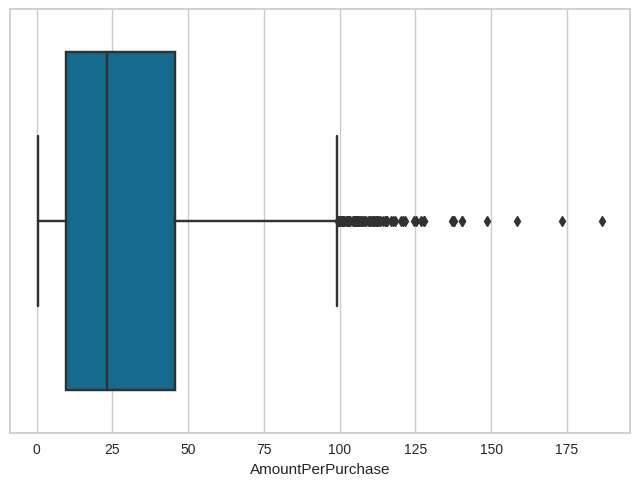

In [ ]:
# Reviewing output
sns.boxplot(data = df, x = 'AmountPerPurchase')

In [ ]:
# Seeing a lot of outliers, but there are too many to justify removal. Instead, we can focus on other ways to normalize the distribution

# We will do this by removing '0' values from 'NumTotalPurchases'
df = df[df['NumTotalPurchases'] != 0]

<Axes: xlabel='AmountPerPurchase', ylabel='Count'>

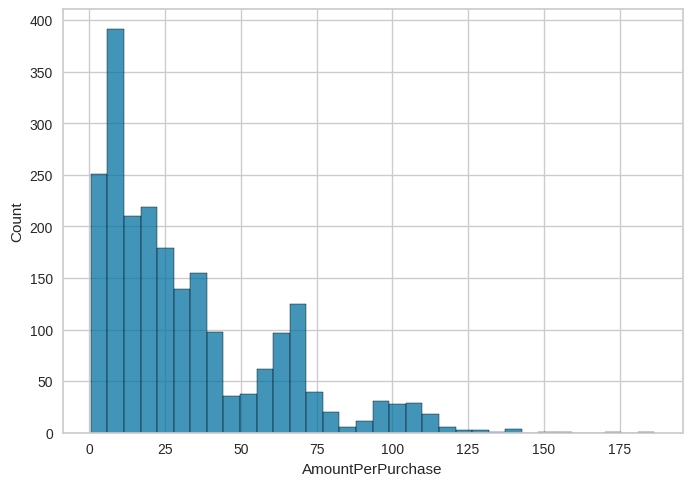

In [ ]:
sns.histplot(data = df, x = 'AmountPerPurchase')

Finally, we can impute the missing values for 'Income' using the median.

In [ ]:
# Imputing missing values using fillna
median_nums = df['Income'].median()

df['Income'] = df['Income'].fillna(median_nums)

In [ ]:
# Checking to make sure values were filled
df['Income'].isnull().sum()

0

These changes enables us to compare relevant data points with more confidence. We will visualize an example of one of those relationships below.

Text(0, 0.5, 'Expenses')

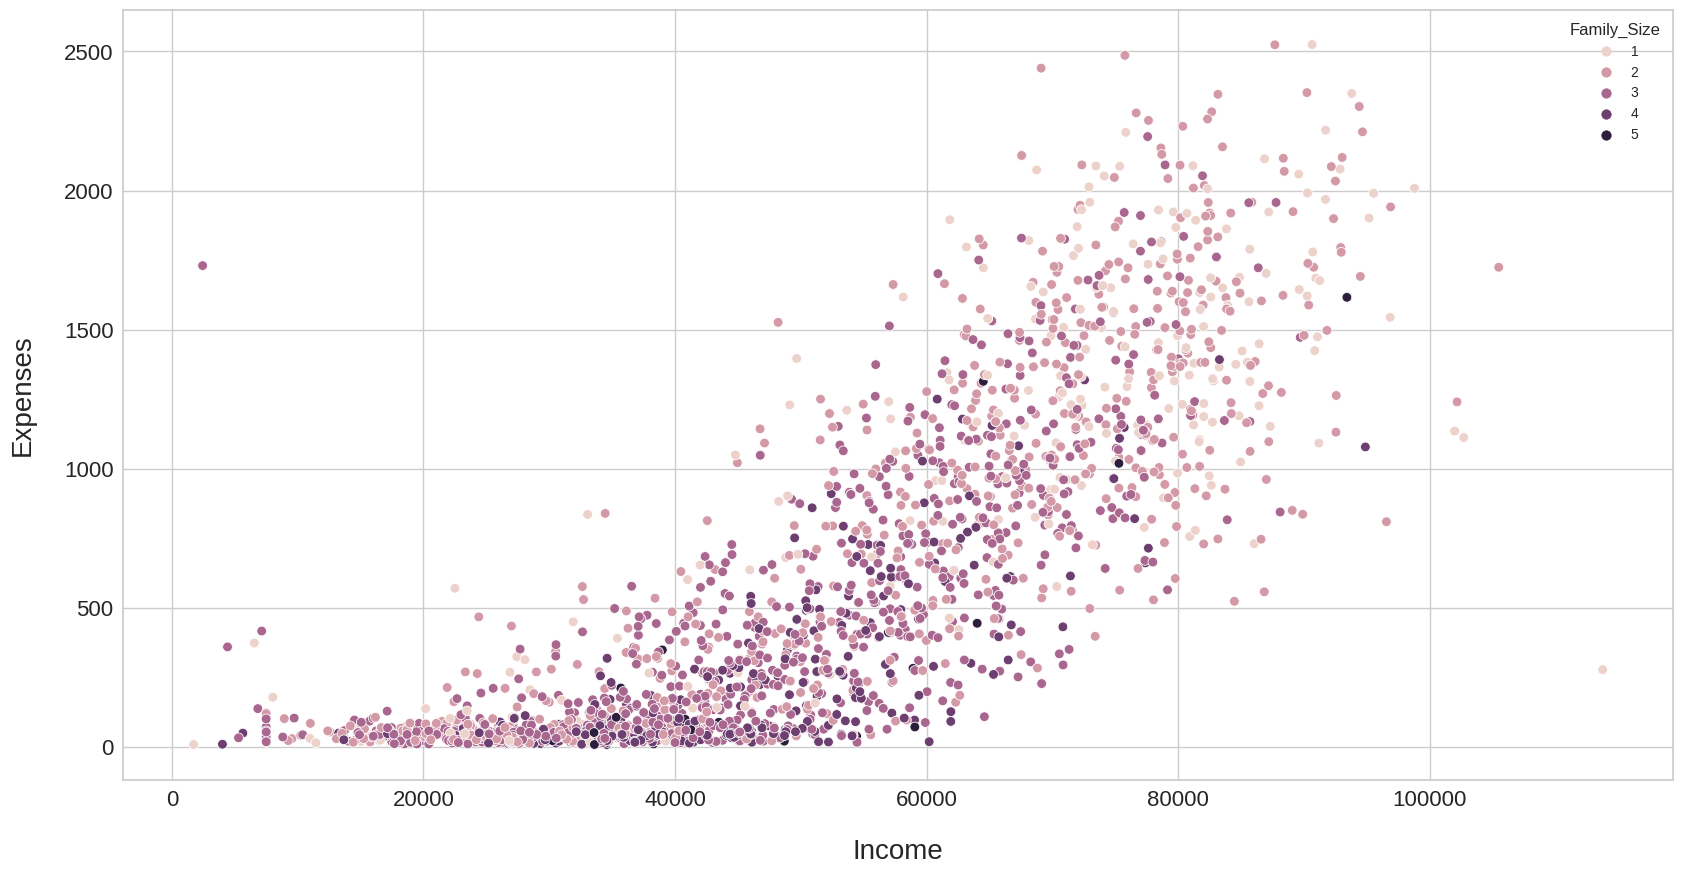

In [ ]:
# Income vs expenses by family size
plt.figure(figsize = (20, 10))

sns.scatterplot(data = df, x = 'Income', y = 'Expenses', hue = 'Family_Size')

plt.xticks(fontsize = 16)

plt.yticks(fontsize = 16)

plt.xlabel("Income", fontsize = 20, labelpad = 20)

plt.ylabel("Expenses", fontsize = 20, labelpad = 20)

## **Insights from EDA and Data Preprocessing**

1. **Age:**
   - The average birth year is around 1969.
   - Customers in the dataset are generally in their late 40s to mid-50s.
   - There are customers with birth years as early as 1893 and as recent as 1996, which will require further investigation to review prospective outliers.

2. **Income:**
   - The average income is approximately $51,634.

   - The income distribution has a relatively high standard deviation, indicating significant variability.
   
   - The minimum income is $1,730, and the maximum is $113,734 after removing extreme values.

3. **Number of Children at Home:**
   - On average, customers have less than one child at home (0.44) and less than one teenager at home (0.51).
   - The distribution of both Kidhome and Teenhome variables is positively skewed, with more customers having 0 children or teenagers at home.

4. **Recency:**
   - The average recency is around 49 days, indicating a recent interaction with the company in the majority of customers.
   - The distribution has a standard deviation of approximately 28.94, suggesting variability in the recency of interactions that spans nearly 1 month. This may speak to the potential value of a specific campaign cadence or subscription-based pricing model.

5. **Spending on Different Products:**
   - Customers, on average, spend more on wine compared to other products.
   - There is considerable variability in spending across different product categories.
   - There is also a positive correlation between Income and product spend, with a number of higher-income customer spending significantly more on wine.

6. **Purchase Behavior:**
   - On average, customers make around 2 to 3 discounted purchases and 4 web purchases.
   - There is a range of catalog and store purchases, with means around 2.64 and 5.82, respectively.
   - The standard deviations indicate variability in purchase behavior, and these trends don't appear to be age-dependent as of yet.

7. **Web Visits:**
   - The average number of web visits per month is approximately 5.33.
   - Customers typically visit the website a few times a month, with variability in visitation patterns.
   - The number of visits averages out at just about 1 visit per week, which could be capitalized upon with push notifications or a lighter campaign with a weekly cadence.

8. **Campaign Acceptance:**
   - The acceptance rates for different marketing campaigns (AcceptedCmp1 through AcceptedCmp5) are generally low, with means ranging from 0.06 to 0.07.
   - We will need to investigate further for the "Why" in this challenge.

9. **Complaints:**
   - The average complaint rate is low, with a mean of approximately 0.01.
   - More than 99% of customers who respond do not file complaints.

10. **Campaign Response:**
   - The average response rate to the campaign is around 0.15, indicating that about 15% of customers responded positively.
   - This is a strong figure, given the porportion of this sentiment versus complaintive responses.

## **Data Preparation for Segmentation**

Now that EDA is complete, we can transition into building our model. This will require us to consider a number of factors:

1. **Variable Selection for Clustering:**
   - Consider the decision of which variables to use for clustering as critically important, with a substantial impact on the clustering outcome.
   - Choose variables for clustering, involving contextual knowledge, creativity, and experimentation/iterations.

2. **Segmentation and Profiling Attributes:**
   - Differentiate between segmentation attributes and profiling attributes in the clustering process.
   - Utilize a subset of data attributes for segmentation, while reserving others for profiling the clusters.

3. **Correlation Plot:**
   - Plot a correlation matrix after removing irrelevant variables.

4. **Data Scaling:**
   - Scale the data as part of the preprocessing step.

In [ ]:
# Dropping all the irrelevant columns and storing in data_model
data_model = df.drop(columns = ['Year_Birth', 'Dt_Customer', 'day', 'Complain', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
        'AcceptedCmp5', 'Marital_Status', 'Status', 'Kids','Education', 'Kidhome','Teenhome', 'Income','Age', 'Family_Size'], axis = 1)

In [ ]:
# Checking new dataframe
data_model.head(5)

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0                   10                  4                  7      1617   
1                    1                  2                  5        27   
2                    2                 10                  4       776   
3                    0                  4                  6        53   
4                    3                  6                  5       422   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0                 25              997                 1          64.680000  
1                  6              151                 0           4.500000  
2                 21              498                 0          36.952381  
3                  8               91                 0           6.625000  
4                 19              347                 0          22.210526

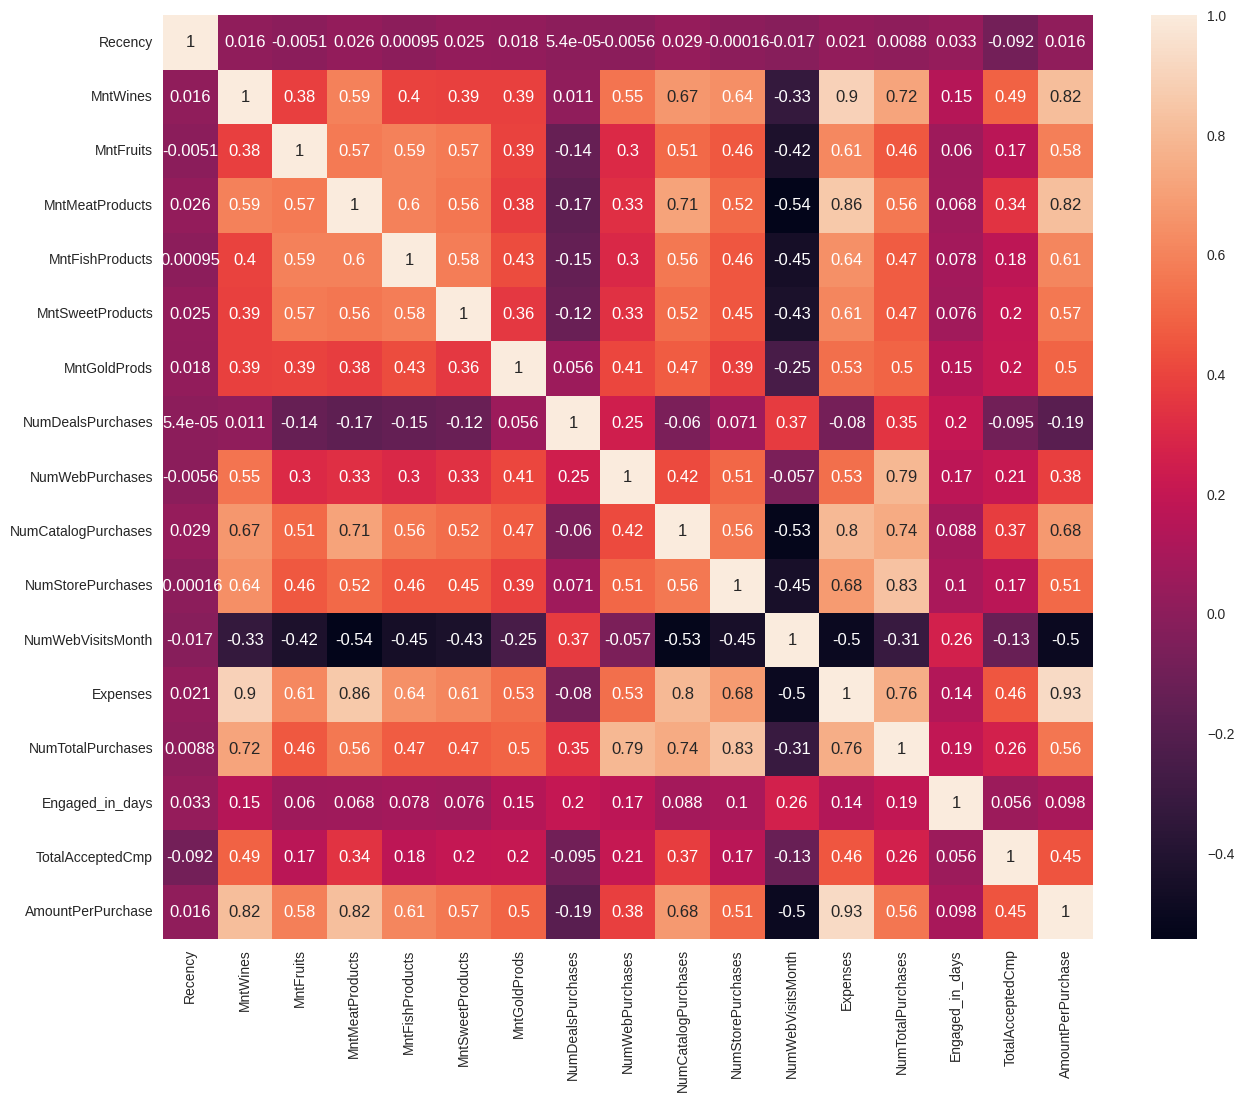

In [ ]:
# Plotting correlations within new dataframe to look at changes
plt.figure(figsize = (15, 12))

sns.heatmap(data_model.corr(), annot = True)

plt.show()

**Insights from Correlation**:

- Removing irrelevant values demonstrated a much stronger relationship between Recency and every other meaninful variable.
- This map also highlights more directly the relationship between the types of items purchased, as wine appears to generally accompany most food purchases.
- This also supports previous insights around the relationship between Income, Family Size, and what a customer spends. With the majority of higher incomes and expenses belonging to people with no children, one can surmise that the are also the people adding wine to their food purchases.
- It is also clear with this new model that deals drive buying behavior, even more than campaigns.
- There is also a strong relationship between discounts and Recency, indicating that the last time a customer made a purchase is directly correlated to the last time a discount was offer.
- This highlights why the standard deviation for an average purchase was just under a month, as that follows the natural cadence of when many retailers may offer varied specials or deals.

We still don't have the full picture, however, as the range of values in our current set of features still prevent us from getting a clearer picture of these relationships.

For that reason, our next step will be to normalize our data through feature scaling.

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying PCA**

In [ ]:
# Initializing StandardScaler
scaler = StandardScaler()

# Fitting the scaler to our model
df_scaled = scaler.fit_transform(data_model)

# Converting the embeddings to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns = data_model.columns)

# Displaying the head of the scaled DataFrame
df_scaled.head().T

0         1         2         3         4
Recency              0.310419 -0.380865 -0.795635 -0.795635  1.554729
MntWines             0.973665 -0.875520  0.354306 -0.875520 -0.395443
MntFruits            1.547618 -0.639073  0.567378 -0.563670  0.416571
MntMeatProducts      1.747373 -0.732220 -0.176608 -0.667935 -0.217934
MntFishProducts      2.447940 -0.652803  1.335321 -0.506885  0.149742
MntSweetProducts     1.479323 -0.635835 -0.149592 -0.587211 -0.003719
MntGoldProds         0.848683 -0.736420 -0.040521 -0.755750 -0.562445
NumDealsPurchases    0.360446 -0.169990 -0.700427 -0.169990  1.421319
NumWebPurchases      1.424218 -1.134960  1.424218 -0.769363  0.327427
NumCatalogPurchases  2.627542 -0.588873 -0.231494 -0.946253  0.125886
NumStorePurchases   -0.564854 -1.182561  1.288270 -0.564854  0.052854
NumWebVisitsMonth    0.696234 -0.137128 -0.553809  0.279553 -0.137128
Expenses             1.678416 -0.964805  0.280335 -0.921583 -0.308156
NumTotalPurchases    1.328091 -1.170669  0.802036 -0.907641  0.539009
Engaged_in_days      1.973788 -1.665588 -0.172842 -1.923700 -0.822423
TotalAcceptedCmp     0.616180 -0.504749 -0.504749 -0.504749 -0.504749
AmountPerPurchase    1.123081 -0.985094  0.151750 -0.910653 -0.364674

<Axes: xlabel='0', ylabel='1'>

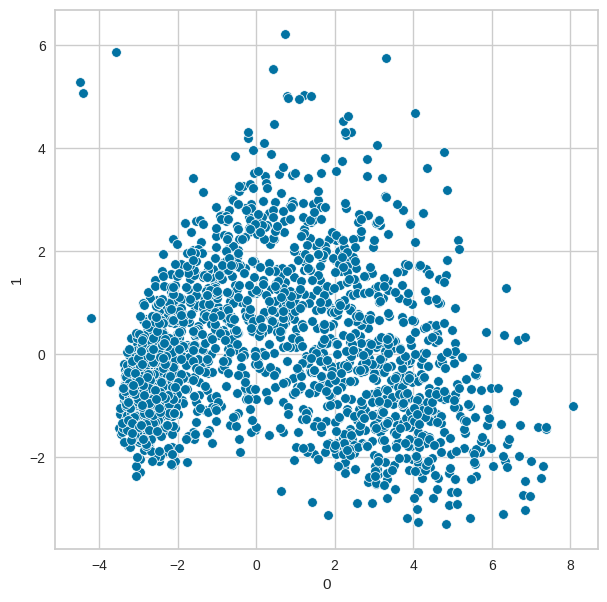

In [ ]:
# Defining the number of principal components to generate
n = df_scaled.shape[1] # Storing the number of variables in the data

# Initializ PCA with n_components = n and random_state = 1
pca = PCA(n_components = n, random_state = 1)

data_pca = pd.DataFrame(pca.fit_transform(df_scaled)) # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_

# Visualizing PCA with two components
plt.figure(figsize =(7, 7))

sns.scatterplot(x = 0, y = 1, data = data_pca)

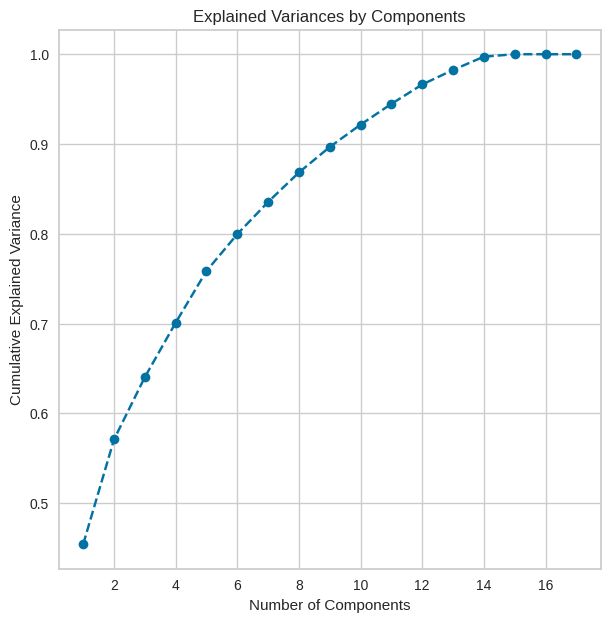

In [ ]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (7, 7))

plt.plot(range(1, 18), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 80% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum > 0.80):

        print("Number of PCs that explain at least 80% variance:", ix + 1)
        break

Number of PCs that explain at least 80% variance: 7


### **Applying T-SNE**

<Axes: xlabel='X1', ylabel='X2'>

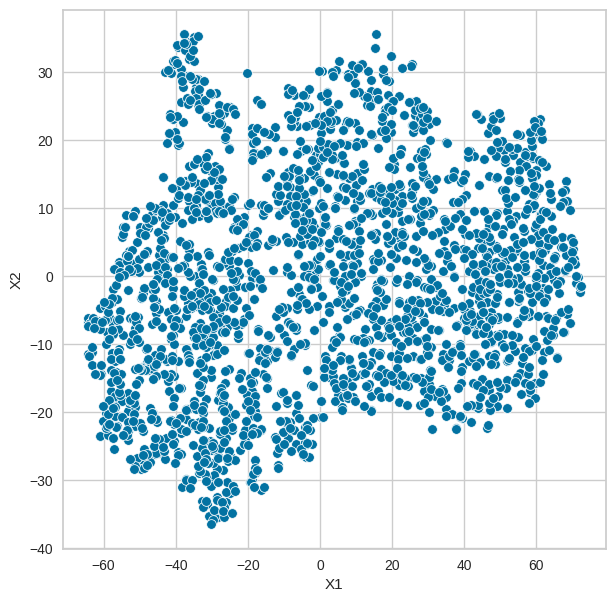

In [ ]:
# Initializing T-SNE with number of components equal to 2, random_state = 1, and perplexity = 35
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

# fit_transform T-SNE on new data
data_tsne = tsne.fit_transform(df_scaled)

# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

# Plotting T-SNE
sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

**Initial Thoughts and Observations**:

- We can see that out of the original 17 features, we have reduced the number of features through PCA to 7 principal components. The first four principal components explain approximately 80% of the original variance.

- This is about a 58% reduction in the dimensionality of the dataset with only a loss of 20% in variance**.

Now, we can focus on testing various models to determine which is most efficient to in solving against our objective.

## **K-Means**

In [ ]:
# Creating an empty list
distortions = []

# Setting the K range from 2 to 10
K = range(2, 10)

for k in K:
  # Initializing K-Means
    kmeanModel = KMeans(n_clusters = k,random_state = 4)
    # Fitting K-Means on the data
    kmeanModel.fit(data_pca)
    distortions.append(kmeanModel.inertia_)

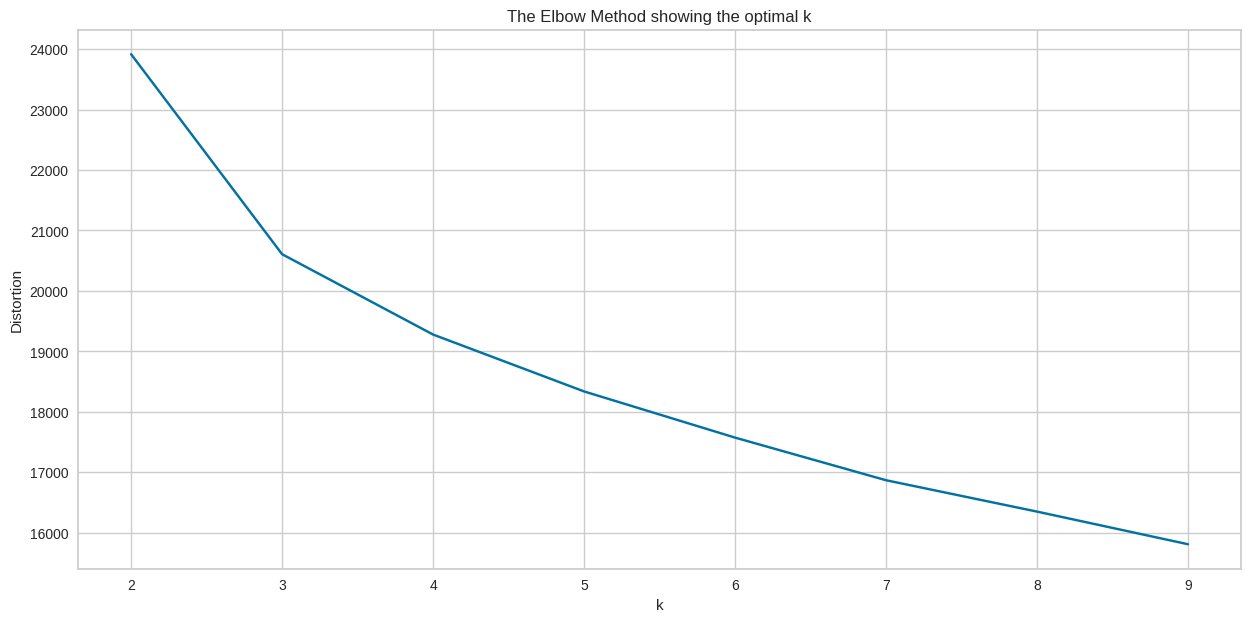

In [ ]:
# Plotting the elbow plot

# Setting the plot size
plt.figure(figsize = (15, 7))

# Plotting the K on X-axis and distortions on y-axis
plt.plot(K, distortions, "bx-")

plt.xlabel("k")

plt.ylabel("Distortion")

plt.title("The Elbow Method showing the optimal k")
plt.show()

We have a couple of options for an optimial k, so we will use silhouette scoring to make the final decision.


In [ ]:
# Creating empty list
sil_score = []

# Creating a range from 2 to 10
cluster_list = range(2, 10)
for k in cluster_list:

    # Initializing K-Means with number of clusters equal to n_clusters and random_state = 1
    clusterer = KMeans(n_clusters = k, random_state = 1)

    # Fittting and predicting in pca data
    preds = clusterer.fit_predict(data_pca)

    # Calculating silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(data_pca, preds)

    # Appending silhouette score to empty list created above
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(k, score))

For n_clusters = 2, the silhouette score is 0.3566998113615501)
For n_clusters = 3, the silhouette score is 0.2766460571979185)
For n_clusters = 4, the silhouette score is 0.2534820948152102)
For n_clusters = 5, the silhouette score is 0.23977211649086)
For n_clusters = 6, the silhouette score is 0.12811736966900222)
For n_clusters = 7, the silhouette score is 0.12914379205520826)
For n_clusters = 8, the silhouette score is 0.12968182472493464)
For n_clusters = 9, the silhouette score is 0.12451649198886766)


According to the silhouette score, the best value of k is 5.

### **Applying KMeans on the PCA data and visualize the clusters**

In [ ]:
# Copying pca data set to get k-means
k_means_df = data_pca.copy()

In [ ]:
# Updating with 3 clusters
kmeans = KMeans(n_clusters = 5, random_state = 1, n_init = "auto") # Creating K-Means with nclusters = 5

kmeans.fit(k_means_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [ ]:
# Creating a copy of data_model
df1 = data_model.copy()

# Adding K-Means cluster labels to the data_pca data
data_pca['K_means_segments_3'] = kmeans.labels_

# Adding K-Means cluster labels to the whole data
df1['K_means_segments_3'] = kmeans.labels_

# Adding K-Means cluster labels to data_model
data_model['K_means_segments_3'] = kmeans.labels_

In [ ]:
# Checking the distribution of clusters
data_model['K_means_segments_3'].value_counts()

1    944
3    393
4    346
2    299
0    221
Name: K_means_segments_3, dtype: int64

In [ ]:
# Visualizing PCA data with new clusters
def pca_plot(X, Y, PCA, cluster):
    sns.scatterplot(x = X, y = 1, data = PCA, hue = cluster)

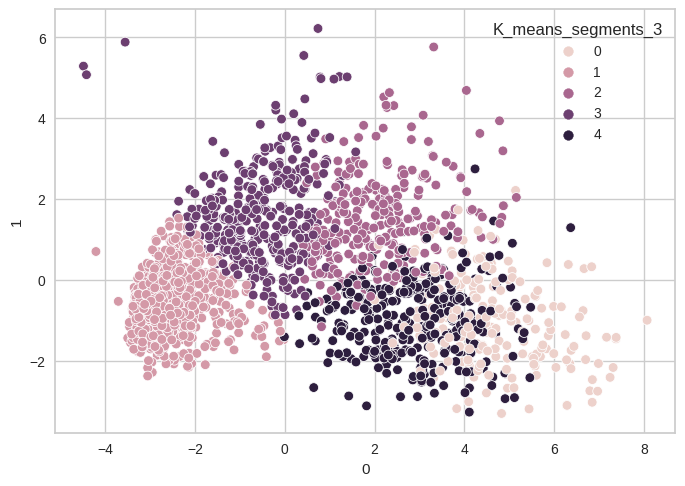

In [ ]:
pca_plot(0, 1, data_pca, 'K_means_segments_3')

So far, it looks like we are beginning to get some meaningful segmentation. Before we assuming anything, however, we will need to profile these clusters.

### **Cluster Profiling**

In [ ]:
# Segmenting data by cluster labels
km_cp = df1.groupby(df1['K_means_segments_3']).mean(numeric_only = True)

km_cp.T

K_means_segments_3             0           1            2           3  \
Recency                46.624434   49.237288    52.234114   46.414758   
MntWines              862.714932   35.992585   675.200669  263.109415   
MntFruits              67.764706    4.711864    31.515050   12.839695   
MntMeatProducts       570.063348   19.868644   201.000000   83.763359   
MntFishProducts        96.411765    6.460805    41.648829   19.849873   
MntSweetProducts       69.972851    4.882415    34.344482   12.834606   
MntGoldProds           77.470588   13.699153    72.421405   46.620865   
NumDealsPurchases       1.104072    1.797669     3.140468    4.445293   
NumWebPurchases         5.122172    1.920551     7.494983    5.577608   
NumCatalogPurchases     6.294118    0.501059     4.551839    1.933842   
NumStorePurchases       7.742081    3.191737     9.307692    5.926209   
NumWebVisitsMonth       3.072398    6.257415     5.545151    6.671756   
Expenses             1744.398190   85.615466  1056.130435  439.017812   
NumTotalPurchases      20.262443    7.411017    24.494983   17.882952   
Engaged_in_days       581.918552  482.911017   626.525084  618.447837   
TotalAcceptedCmp        2.131222    0.152542     0.501672    0.386768   
AmountPerPurchase      89.537579   10.565343    43.971825   24.206105   

K_means_segments_3             4  
Recency                50.132948  
MntWines              419.552023  
MntFruits              70.300578  
MntMeatProducts       366.338150  
MntFishProducts       102.867052  
MntSweetProducts       70.612717  
MntGoldProds           78.367052  
NumDealsPurchases       1.401734  
NumWebPurchases         4.809249  
NumCatalogPurchases     5.341040  
NumStorePurchases       8.684971  
NumWebVisitsMonth       2.526012  
Expenses             1108.037572  
NumTotalPurchases      20.236994  
Engaged_in_days       493.508671  
TotalAcceptedCmp        0.216763  
AmountPerPurchase      56.187641

In [ ]:
# Highlighting max values to spot trends for context
km_cp.style.highlight_max(color = "lightgreen", axis = 0)

### **Characteristics of each cluster**

**Summary of each cluster:**

Based on the current clustering method, customers have been segemented by their spending volume and additional behavioral factors like level of engagement.

- **Cluster 0 (High-Value, Engaged Customers)**: This cluster represents customers who have high spending across various product categories, especially in wines. They have a high acceptance rate for campaigns, high engagement, and visit the web moderately.

- **Cluster 1 (Low-Value, Less Engaged Customers)**: This cluster consists of customers with lower spending, lower engagement, and lower acceptance rates for campaigns. They visit the web more frequently but make fewer purchases.

- **Cluster 2 (Moderate-Value, Engaged Customers)**: These customers have moderate to high spending and engagement levels. They make a considerable number of purchases, especially online, and have a balanced acceptance rate for campaigns.

- **Cluster 3 (Balanced, Engaged Customers)**: Customers in this cluster have balanced spending across various product categories and show moderate engagement. They accept campaigns at a moderate rate and have a balanced distribution of purchases.

- **Cluster 4 (High-Value, Less Engaged Customers)**: This cluster represents customers with high spending across product categories, especially in wines and meat. They have high acceptance rates for campaigns but visit the web less frequently.

While these results are meaningful, there is a still a question of whether we can dig even more deeply into an impactful segmentation model. For that analysis, we will explore K-Medoids, Hierarchical Clustering, DBSCAN, and a Gaussian Mixture Model.

In [ ]:
# Dropping labels we got from K-Means to use PCA data for prediction
data_pca.drop("K_means_segments_3", axis = 1, inplace = True)
df1.drop("K_means_segments_3", axis = 1, inplace = True)

## **K-Medoids**

In [ ]:
# Copying PCA data to a new df for K-Medoid
kmed_df = data_pca.copy()

In [ ]:
# Initializing K-Medoids with number of clusters as 5 and random_state = 1
kmedo = KMedoids(n_clusters = 5, random_state = 1)

# Fitting and predicting K-Medoids using data_pca
preds = kmedo.fit_predict(data_pca)

# Calculating the silhouette score
score = silhouette_score(data_pca, preds)

print(score)

0.11933642807926274


In [ ]:
# Creating a copy of the original data
df2 = df1.copy()

# Adding K-Medoids cluster labels to K-Medoids data
kmed_df['KMed_segments'] = kmedo.labels_

# Adding K-Medoids cluster labels to original data
df2['KMed_segments'] = kmedo.labels_

In [ ]:
# Checking the distribution of KMed clusters
df2['KMed_segments'].value_counts()

0    678
2    625
1    308
3    300
4    292
Name: KMed_segments, dtype: int64

### **Visualize the clusters using PCA**

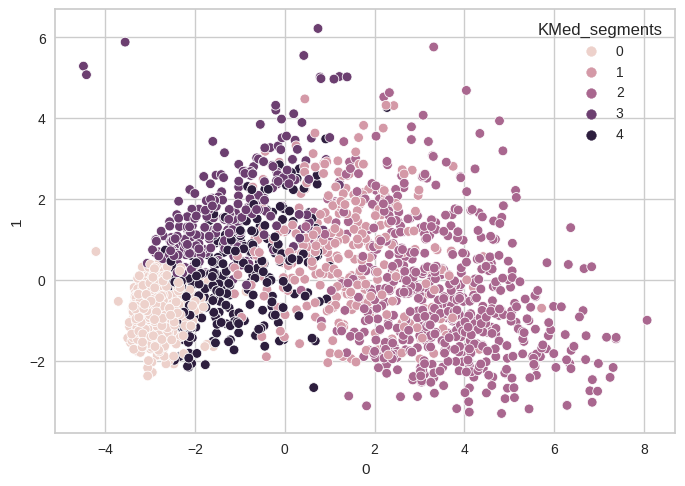

In [ ]:
# Visualizing PCA data with KMed clusters
pca_plot(0, 1, kmed_df, 'KMed_segments')

### **Cluster Profiling**

In [ ]:
# Segmenting data by cluster labels
kmed_cp = df2.groupby(df2['KMed_segments']).mean(numeric_only = True)

kmed_cp.T

KMed_segments                 0           1            2           3  \
Recency               44.728614   31.941558    54.484800   45.763333   
MntWines              21.092920  521.155844   634.243200  172.353333   
MntFruits              3.345133   26.970779    66.904000    8.506667   
MntMeatProducts       13.293510  175.873377   422.987200   63.186667   
MntFishProducts        4.983776   37.204545    95.304000   14.490000   
MntSweetProducts       3.446903   32.048701    66.600000    9.356667   
MntGoldProds          10.289086   46.113636    86.475200   43.533333   
NumDealsPurchases      1.533923    2.613636     1.753600    4.513333   
NumWebPurchases        1.603245    6.139610     5.748800    4.473333   
NumCatalogPurchases    0.287611    3.782468     5.707200    1.383333   
NumStorePurchases      2.859882    9.162338     8.243200    4.526667   
NumWebVisitsMonth      6.494100    4.636364     3.512000    7.706667   
Expenses              56.451327  839.366883  1372.513600  311.426667   
NumTotalPurchases      6.284661   21.698052    21.452800   14.896667   
Engaged_in_days      469.890855  481.425325   586.208000  752.243333   
TotalAcceptedCmp       0.169617    0.818182     0.788800    0.336667   
AmountPerPurchase      8.490237   39.196553    67.014114   20.151278   

KMed_segments                 4  
Recency               68.640411  
MntWines             178.643836  
MntFruits             11.215753  
MntMeatProducts       61.664384  
MntFishProducts       15.417808  
MntSweetProducts      10.883562  
MntGoldProds          30.335616  
NumDealsPurchases      2.797945  
NumWebPurchases        3.866438  
NumCatalogPurchases    1.681507  
NumStorePurchases      5.376712  
NumWebVisitsMonth      4.801370  
Expenses             308.160959  
NumTotalPurchases     13.722603  
Engaged_in_days      433.866438  
TotalAcceptedCmp       0.106164  
AmountPerPurchase     20.907067

In [ ]:
# Highlighting max values to spot trends for context
kmed_cp.style.highlight_max(color = "lightgreen", axis = 0)

### **Characteristics of each cluster**

**Summary for each cluster:**

- **Cluster 0 (Moderate Value, Low Engagement)**: Customers in this cluster have moderate spending across categories, low engagement, and a low acceptance rate for campaigns.

- **Cluster 1 (High Value, Moderate Engagement)**: This cluster includes high-value customers with significant spending across various categories, moderate engagement, and a high acceptance rate for campaigns.

- **Cluster 2 (High Value, Moderate Engagement)**: Similar to Cluster 1, this cluster represents high-value customers with substantial spending and moderate engagement, showing a high acceptance rate for campaigns.

- **Cluster 3 (Balanced Value, High Engagement)**: Customers in this cluster have balanced spending and higher engagement. They have a higher acceptance rate for campaigns and visit the web more frequently.

- **Cluster 4 (Moderate Value, Moderate Engagement)**: This cluster represents customers with moderate spending and engagement levels. They have a moderate acceptance rate for campaigns.

Based on the segmentation of data using a K-Means algorithm, it appears that removing some of the prominent outliers also reduced the benefit of using KMeds over K-Means.

## **Hierarchical Clustering**

After analyzing K-Means and K-Medoids, we can calculate the Cophenetic correlation for various distances using different linkage methods.

We will also create dendrograms corresponding to each linkage method and explore the relationships between different linkages and each distance metric.

In [114]:
# Edit: Ran into recursion errors, so setting a higher limit
import sys
sys.setrecursionlimit(10000)

In [109]:
# Listing distance metrics
distance_metrics = ['euclidean', 'chebyshev', 'mahalanobis', 'cityblock']

# Listing linkage methods
linkage_methods = ['single', 'complete', 'average']

# Creating a variable by assigning 0 to it
high_cophenet_corr = 0

# Creating a list by assigning 0's to it
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
      # Applying different linkages with different distance on data_pca
        Z = linkage(data_pca, metric = dm, method = lm)
        # Calculating cophenetic correlation
        c, coph_dists = cophenet(Z, pdist(data_pca))
        print(
            'Cophenetic correlation for {} distance and {} linkage is {}.'.format(
                dm.capitalize(), lm, c
            )
        )# Checking if cophenetic correlation is higher than previous score
        if high_cophenet_corr < c:
          # Appending to high_cophenet_corr list if it is higher
            high_cophenet_corr = c
            # Appending its corresponding distance
            high_dm_lm[0] = dm
            # Appending its corresponding method or linkage
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8014874731931623.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6394199183682101.
Cophenetic correlation for Euclidean distance and average linkage is 0.8271378991901995.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7800062704683355.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6806064371686719.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7564294058121194.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5168118317128207.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5746400342446171.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.5641412497377504.
Cophenetic correlation for Cityblock distance and single linkage is 0.8121314904837764.
Cophenetic correlation for Cityblock distance and complete linkage is 0.719336663409715.
Cophenetic corre

In [110]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    'Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.'.format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8394213982580793, which is obtained with Cityblock distance and average linkage.


Based on the cophenetic correlation, we can delve deeper into this analysis starting with Cityblock distance.

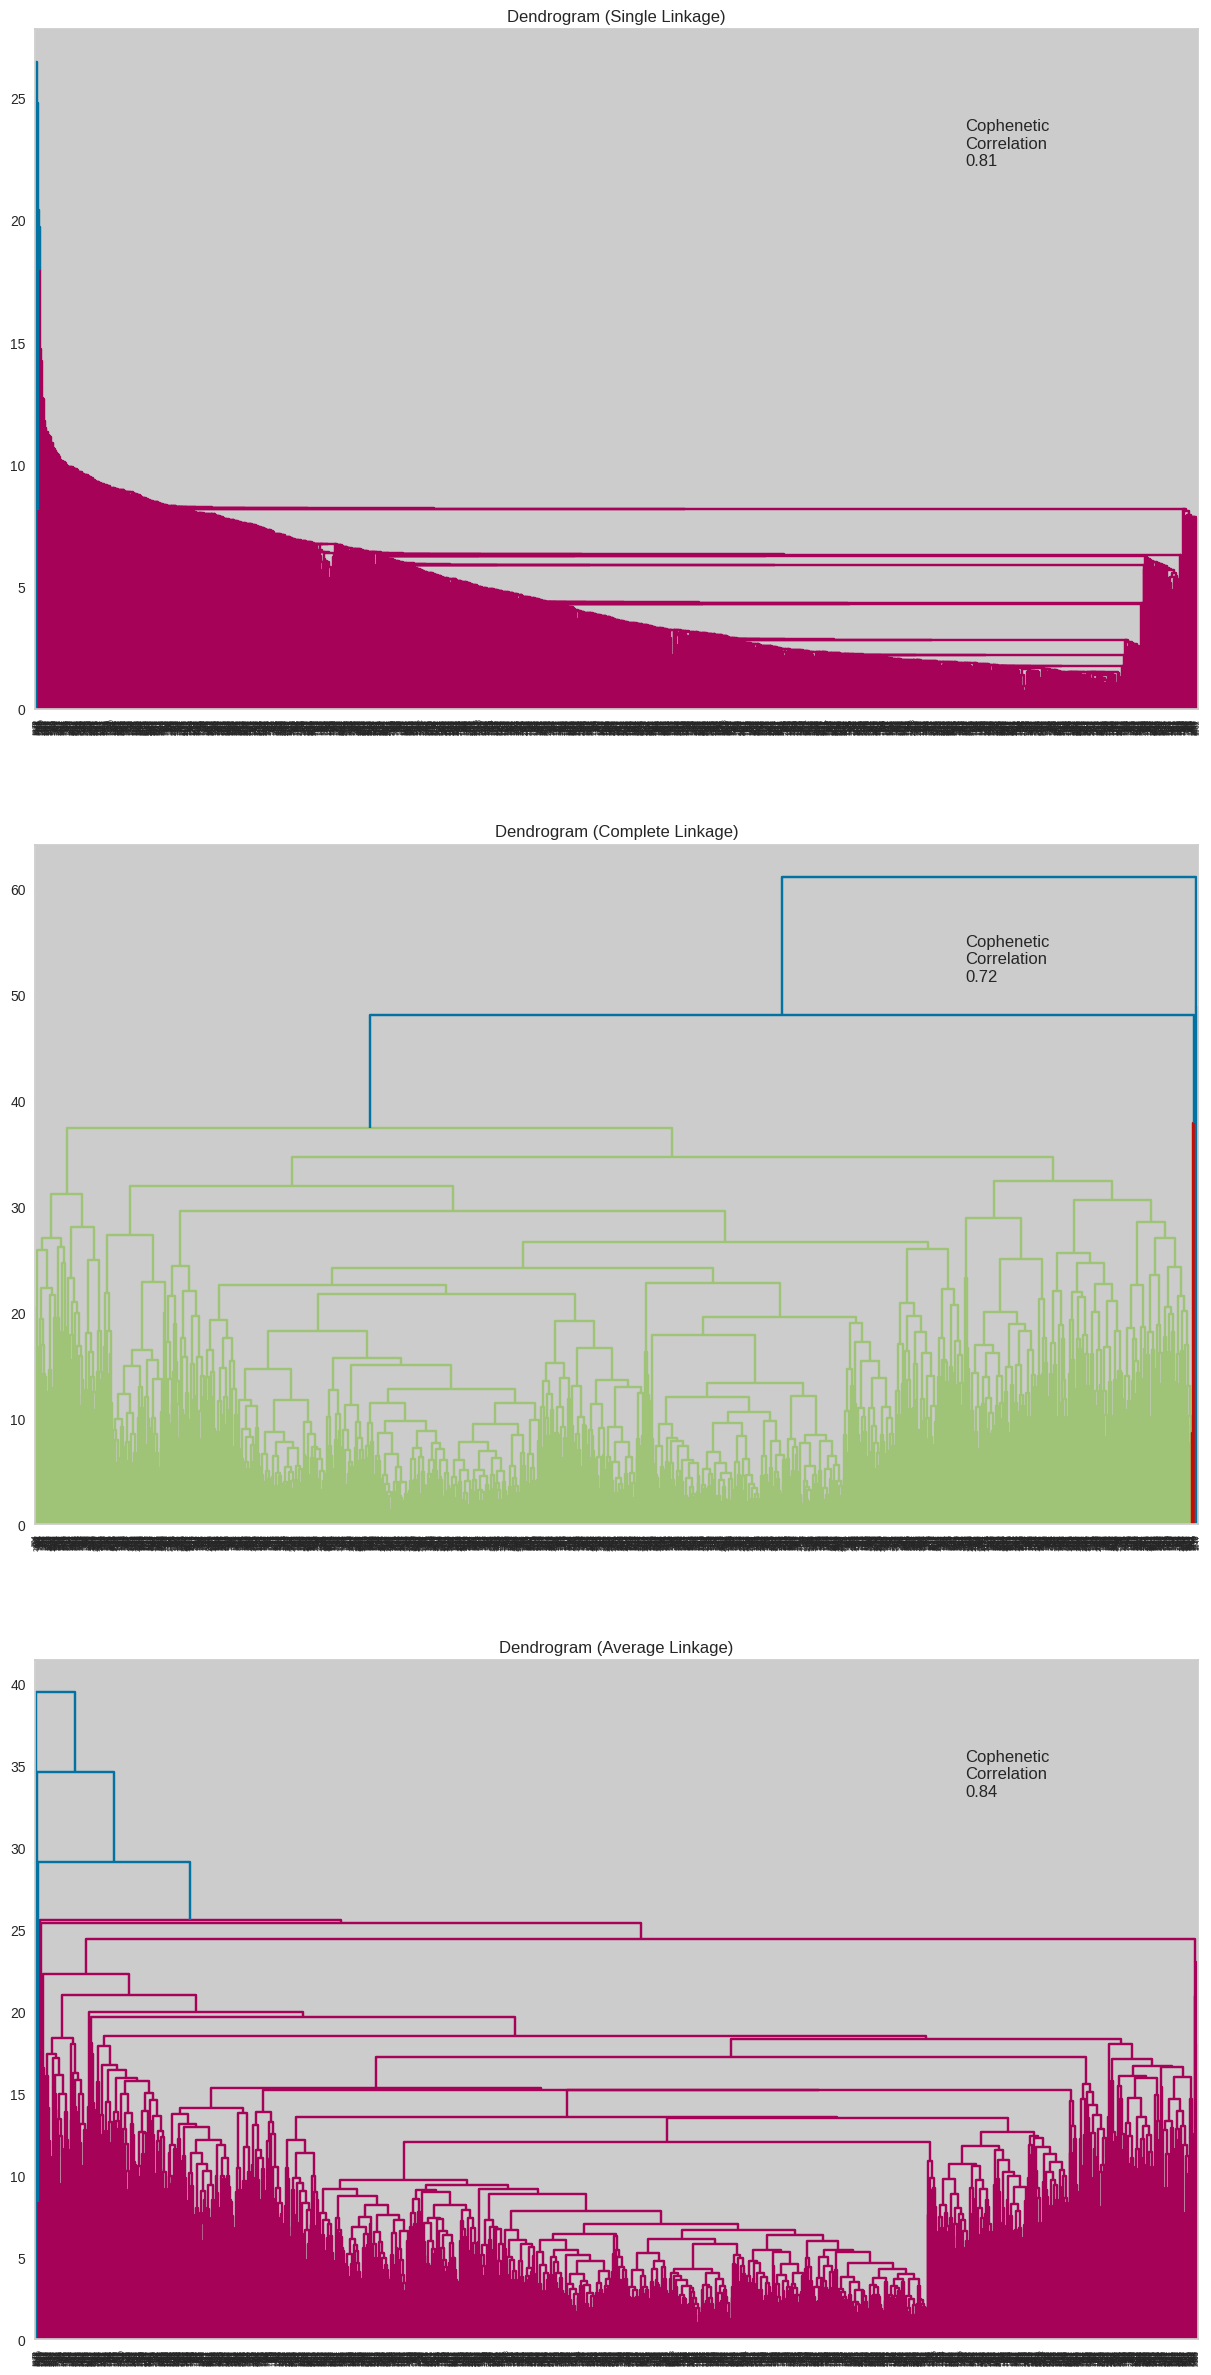

In [115]:
# Listing linkage methods
linkage_methods = ['single', 'complete', 'average']

# Listing to save results of cophenetic correlation calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']

# Creating a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above

# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
  # Measures the distances between two clusters
    Z = linkage(data_pca, metric = 'Cityblock', method = method)

    dendrogram(Z, ax = axs[i])
    # Title of dendrogram
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    # Finding cophenetic correlation for different linkages with city block distance
    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))
    axs[i].annotate(
        f'Cophenetic\nCorrelation\n{coph_corr:0.2f}',
        (0.80, 0.80),
        xycoords = 'axes fraction',
    )

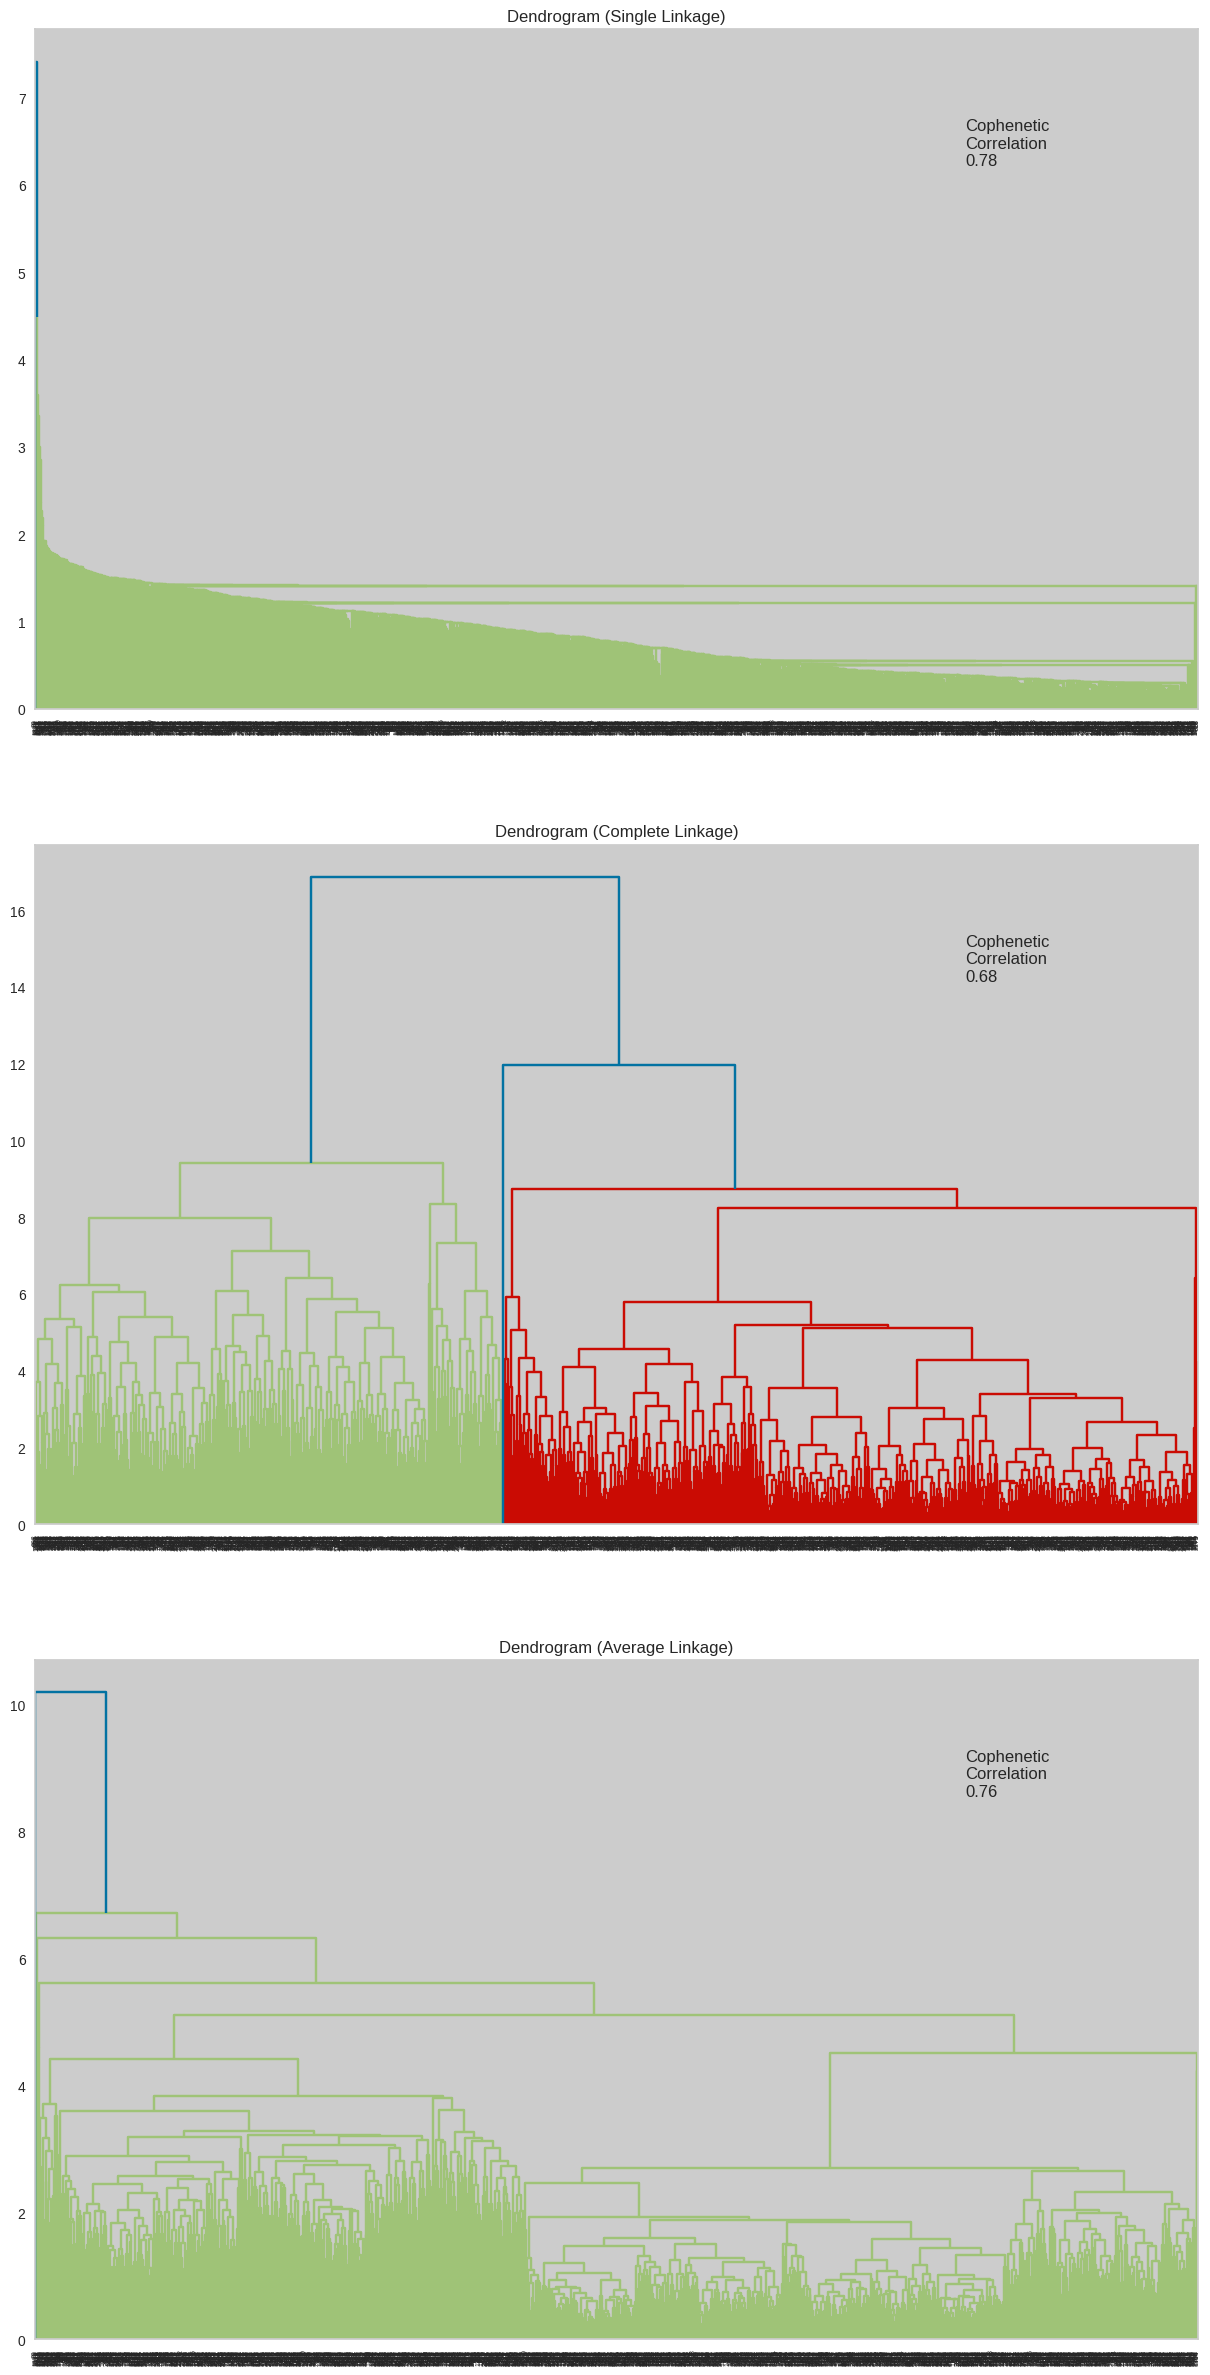

In [116]:
# Testing additional dendrograms to review other potential clustering

 # Listing linkage methods
linkage_methods = ['single', 'complete', 'average']

# Listing to save results of cophenetic correlation calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']

# Creating a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above

# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
  # Measures the distances between two clusters
    Z = linkage(data_pca, metric = 'Chebyshev', method = method)

    dendrogram(Z, ax = axs[i])
    # Title of dendrogram
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    # Finding cophenetic correlation for different linkages with Chebyshev distance
    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))
    axs[i].annotate(
        f'Cophenetic\nCorrelation\n{coph_corr:0.2f}',
        (0.80, 0.80),
        xycoords = 'axes fraction',
    )

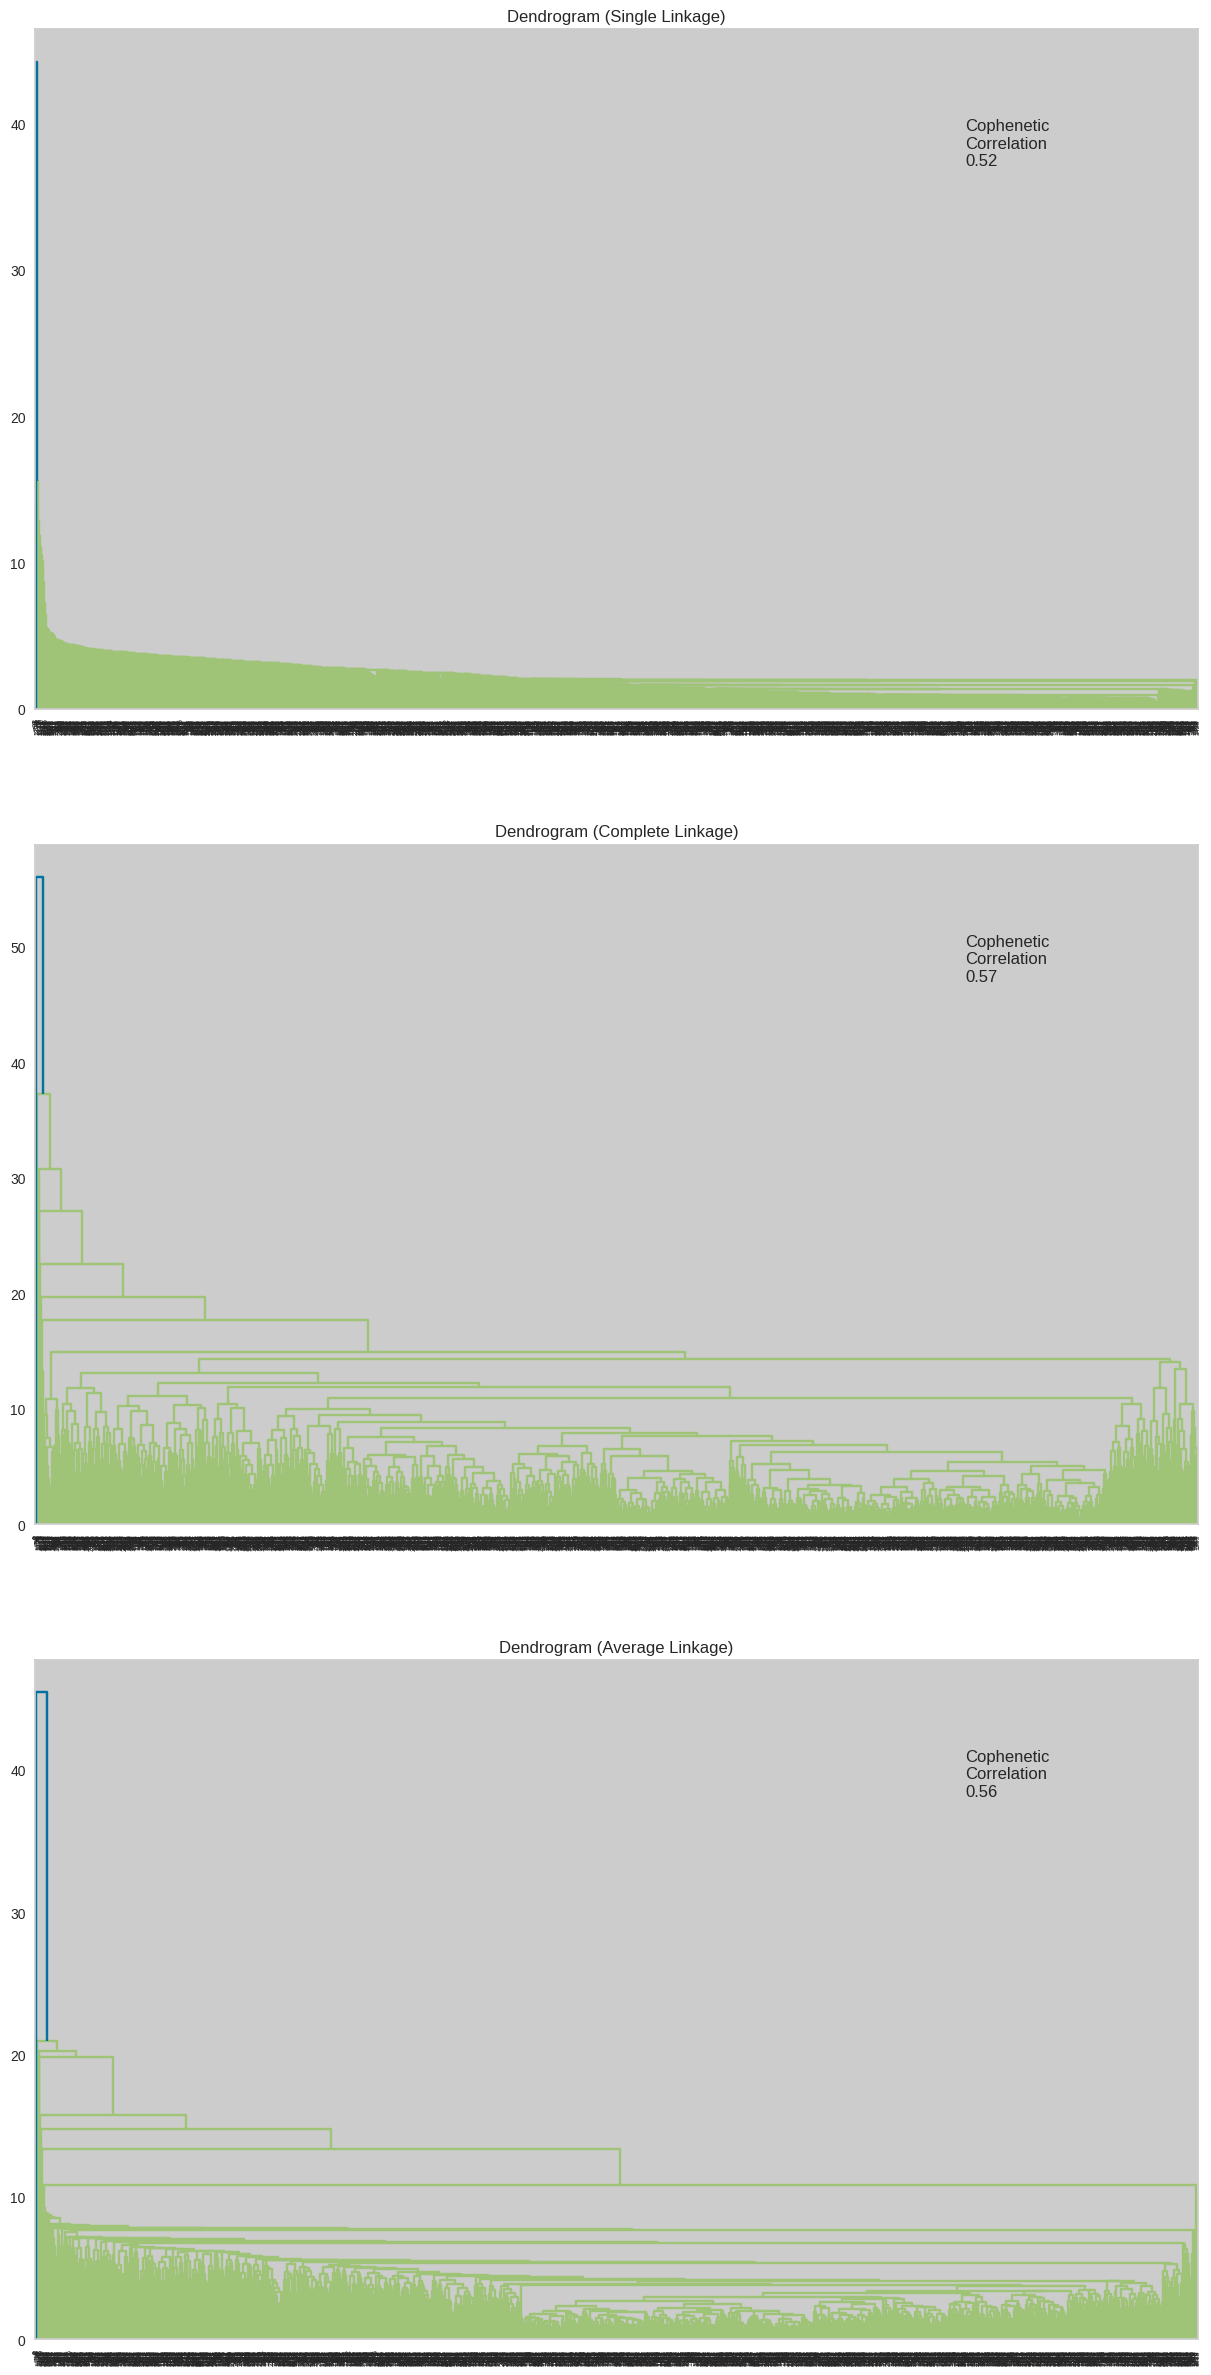

In [117]:
# Testing additional dendrograms to review other potential clustering

# Listing linkage methods
linkage_methods = ['single', 'complete', 'average']

# Listing to save results of cophenetic correlation calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']

# Creating a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above

# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
  # Measures the distances between two clusters
    Z = linkage(data_pca, metric = 'Mahalanobis', method = method)

    dendrogram(Z, ax = axs[i])
    # Title of dendrogram
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    # Finding cophenetic correlation for different linkages with Mahalanobis distance
    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))
    axs[i].annotate(
        f'Cophenetic\nCorrelation\n{coph_corr:0.2f}',
        (0.80, 0.80),
        xycoords = 'axes fraction',
    )

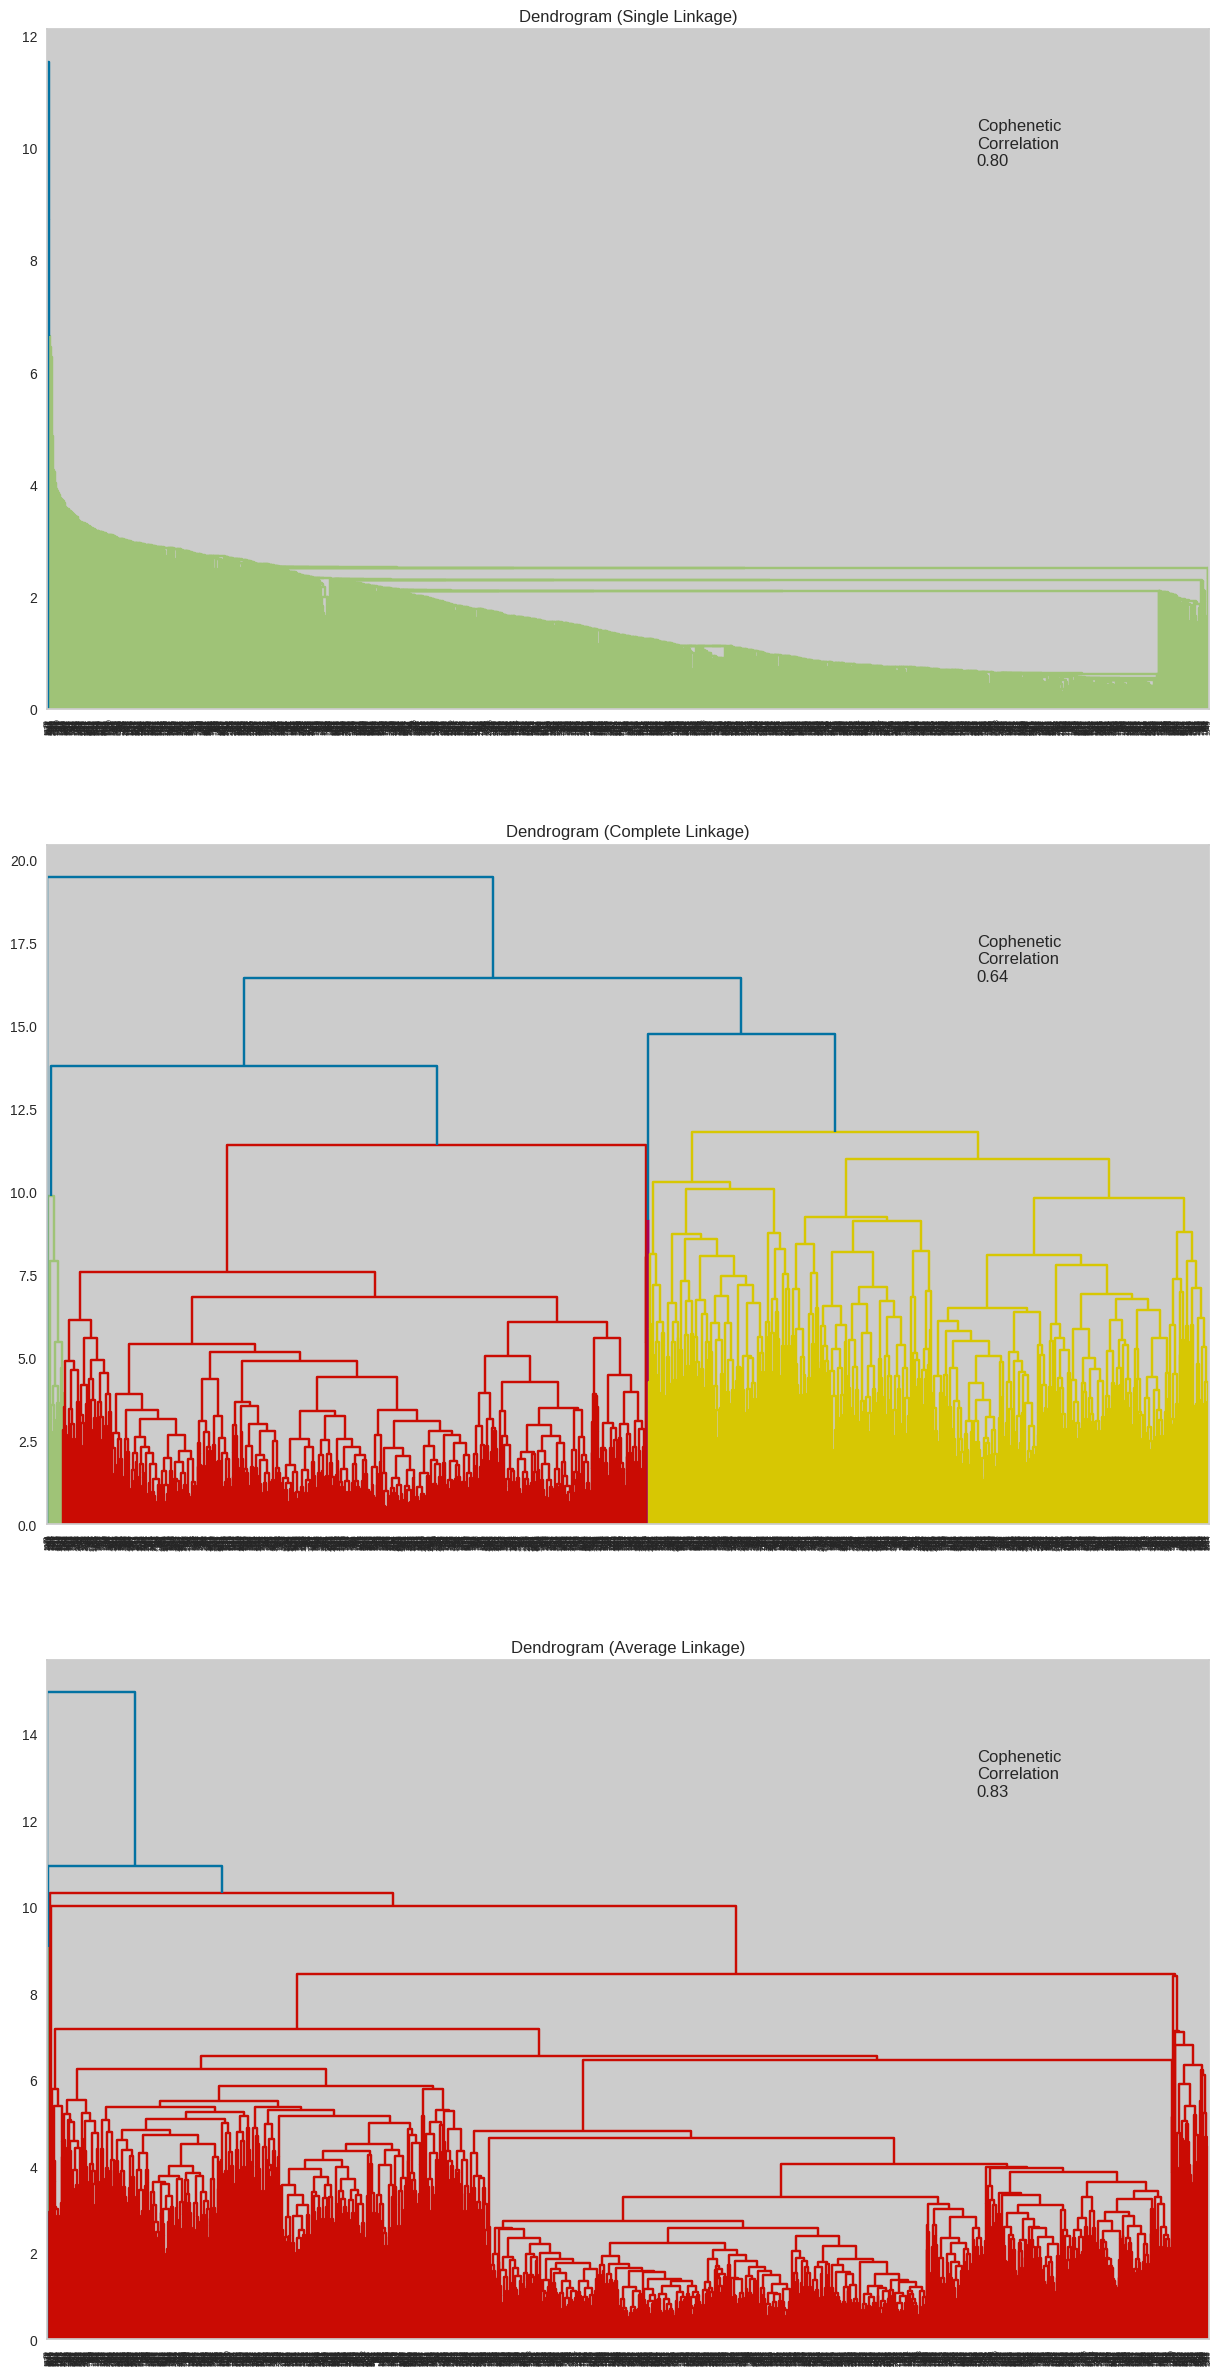

In [118]:
# Testing additional dendrograms to review other potential clustering

 # Listing linkage methods
linkage_methods = ['single', 'complete', 'average']

# Listing to save results of cophenetic correlation calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']

# Creating a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above

# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
  # Measures the distances between two clusters
    Z = linkage(data_pca, metric = 'Euclidean', method = method)

    dendrogram(Z, ax = axs[i])
    # Title of dendrogram
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    # Finding cophenetic correlation for different linkages with Euclidean distance
    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))
    axs[i].annotate(
        f'Cophenetic\nCorrelation\n{coph_corr:0.2f}',
        (0.80, 0.80),
        xycoords = 'axes fraction',
    )

Based on what we've can see thus far, it looks like 3 clusters would be the best way to segment this model.

In [127]:
# Creating a copy of the data for clustering
df3 = df1.copy()

In [128]:
# Initializing Agglomerative Clustering with distance as Euclidean, linkage as 'Ward' with 3 clusters
HCmodel = AgglomerativeClustering(n_clusters = 3 , metric = 'euclidean' , linkage = 'average' )

# Fitting on data_pca
HCmodel.fit(df3)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3)

In [129]:
# Add Agglomerative Clustering cluster labels to data_pca
data_pca['Agg_Cluster_Labels'] = HCmodel.labels_

# Add Agglomerative Clustering cluster labels to the whole data
df3['Agg_Cluster_Labels'] = HCmodel.labels_

# Add Agglomerative Clustering cluster labels to data_model
data_model['Agg_Cluster_Labels'] = HCmodel.labels_


In [130]:
# Checking distribution
df3['Agg_Cluster_Labels'].value_counts()

2    1315
0     887
1       1
Name: Agg_Cluster_Labels, dtype: int64

### **Visualize the clusters using PCA**

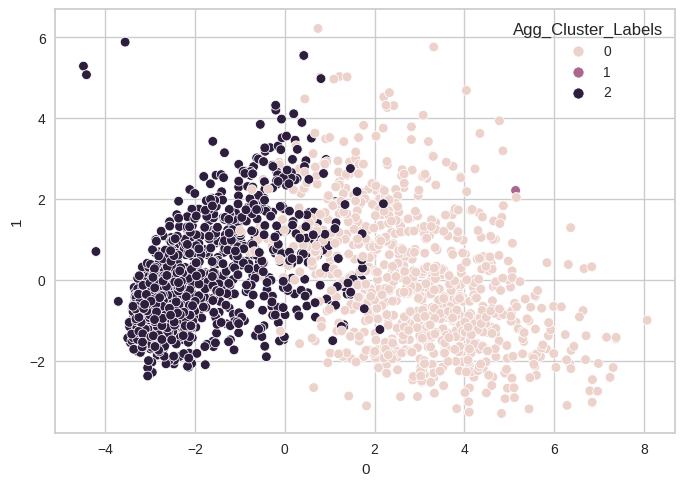

In [131]:
# Visualizing PCA data with HC clusters
pca_plot(0, 1, data_pca, 'Agg_Cluster_Labels')

### **Cluster Profiling**

In [132]:
# Segmenting data by cluster labels
hcp = df3.groupby(df3['Agg_Cluster_Labels']).mean(numeric_only = True)

hcp.T

Agg_Cluster_Labels             0            1           2
Recency                49.301015    42.000000   48.834221
MntWines              633.356257     1.000000   86.160456
MntFruits              52.901917     1.000000    8.587072
MntMeatProducts       349.602029  1725.000000   40.067681
MntFishProducts        76.234498     1.000000   11.886692
MntSweetProducts       54.687711     1.000000    8.600000
MntGoldProds           73.705750     1.000000   24.156654
NumDealsPurchases       2.118377    15.000000    2.447148
NumWebPurchases         5.870349     0.000000    2.916350
NumCatalogPurchases     5.163472    28.000000    0.931559
NumStorePurchases       8.593010     0.000000    3.968821
NumWebVisitsMonth       3.919955     1.000000    6.282890
Expenses             1240.488162  1730.000000  179.458555
NumTotalPurchases      21.745209    43.000000   10.263878
Engaged_in_days       550.812852   579.000000  529.625095
TotalAcceptedCmp        0.818489     0.000000    0.202281
AmountPerPurchase      59.861820    40.232558   14.239788

In [133]:
# Highlighting max values to spot trends for context
hcp.style.highlight_max(color = "lightgreen", axis = 0)

### **Characteristics of each cluster**

**Summary of each cluster:**

- **Cluster 0 (Moderate Spenders, Balanced Engagement)**: This cluster represents a moderate-sized group of customers with moderate spending across various product categories. They exhibit balanced engagement, with a moderate number of purchases, visits, and campaign acceptances.

- **Cluster 1 (High Spenders, Low Engagement)**: This cluster is characterized by two customers who are high spenders, especially in meat products, but show low engagement in terms of web visits and campaign acceptances.

- **Cluster 2 (Low to Moderate Spenders, Moderate Engagement)**: The largest cluster consists of customers with lower spending, particularly in wines, but they show a moderate level of engagement with a reasonable number of purchases, web visits, and campaign acceptances.

These are good categories to be privy to, but from the perspective of segmentation for a go to market strategy, I wouldn't think hierarchal clustering is the answer. This is especially true given the presence of "Moderate" spending within multiple clusters.

## **DBSCAN**

DBSCAN can be powerful, but it will require that we determinine the best set of hyperparameters to use with it. If we can find the right ones, we may find a viable alternative to clustering with K-Means, which appears to be the best method thus far.

In [134]:
# Dropping labels we got from Agglomerative Clustering since we will be using PCA data for prediction
data_pca.drop('Agg_Cluster_Labels', axis = 1, inplace = True)
df3.drop('Agg_Cluster_Labels', axis = 1, inplace = True)

In [135]:
# Initializing lists

# Taking random eps value
eps_value = [2,3]

# Taking random min_sample value
min_sample_values = [6,20]

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}

In [136]:
# Finding the silhouette_score for each of the combinations

# Assigning 0 to the high_silhouette_avg variable
high_silhouette_avg = 0

# Assigning 0's to the high_i_j list
high_i_j = [0, 0]

# Assigning dictionary keys to a variable called key
key = res.keys()
for i in key:
    # Assigning dictionary values of each i to z
    z = res[i]
    for j in z:
        # Applying DBSCAN to each of the combination in dictionary
        db = DBSCAN(eps = i, min_samples = j).fit(data_pca)
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        # Finding silhouette score
        silhouette_avg = silhouette_score(data_pca, labels)
        print(
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            # Printing the silhouette score for each of the combinations
            silhouette_avg,
        )# If the silhouette score is greater than 0 or the previous score,
        # it will get appended to the high_silhouette_avg list with its combination of i and j
        if high_silhouette_avg < silhouette_avg:
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.130802641241693
For eps value =2 For min sample =20 The average silhoutte_score is : 0.34613055443896856
For eps value =3 For min sample =6 The average silhoutte_score is : 0.28328461444241265
For eps value =3 For min sample =20 The average silhoutte_score is : 0.33826592278363954


In [137]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

In [138]:
# Copying new dataset from set with removed labels
df4 = df3.copy()

In [139]:
# Using the silhoutte score hyperparameters to apply DBSCAN
dbs = DBSCAN(eps = 3, min_samples = 20)

# Fitting to the model
dbs.fit(df4)

DBSCAN(eps=3, min_samples=20)

In [144]:
# Adding DBSCAN cluster labels to the whole data
df4['DBSCAN_Cluster_Labels'] = dbs.labels_

# Adding DBSCAN cluster labels to data_model
data_model['DBSCAN_Cluster_Labels'] = dbs.labels_

# Adding DBSCAN cluster labels to data_pca
data_pca['DBSCAN_Cluster_Labels'] = dbs.labels_

In [145]:
# Checking distribution
df4['DBSCAN_Cluster_Labels'].value_counts()

-1    2203
Name: DBSCAN_Cluster_Labels, dtype: int64

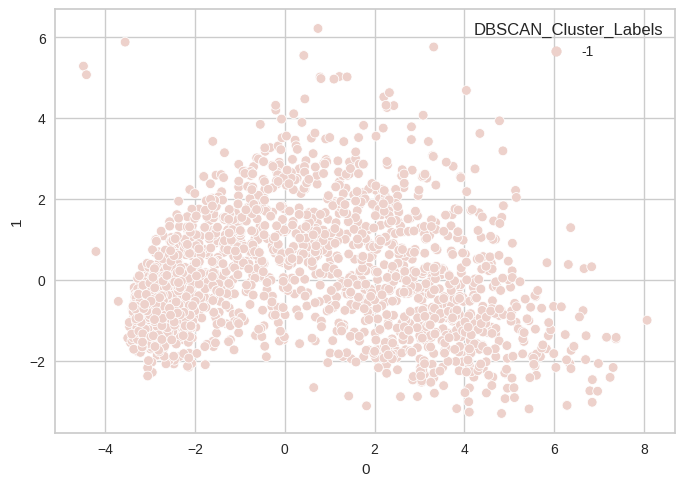

In [146]:
# Visualizing PCA data with DBSCAN hyperparameter
pca_plot(0, 1, data_pca, 'DBSCAN_Cluster_Labels')

In [147]:
# Profiling
dbs_cp = df4.groupby(df4['DBSCAN_Cluster_Labels']).mean(numeric_only = True)

dbs_cp.T

DBSCAN_Cluster_Labels          -1
Recency                 49.019065
MntWines               306.440763
MntFruits               26.426237
MntMeatProducts        165.461189
MntFishProducts         37.790286
MntSweetProducts        27.152973
MntGoldProds            44.096232
NumDealsPurchases        2.320472
NumWebPurchases          4.104403
NumCatalogPurchases      2.647753
NumStorePurchases        5.828870
NumWebVisitsMonth        5.329097
Expenses               607.367680
NumTotalPurchases       14.901498
Engaged_in_days        538.178393
TotalAcceptedCmp         0.450295
AmountPerPurchase       32.620512

### **Characteristics of each cluster**

**Summary of findings:**

 - The DBSCAN cluster (-1) represents customers with moderate spending across various product categories. They exhibit a moderate level of engagement, with a reasonable number of purchases, web visits, and campaign acceptances.

- Compared to K-Means, K-Medoids, and Hierarchical Clustering, the DBSCAN cluster shares similarities with the Hierarchical Cluster 0 and K-Means Segment 1 in terms of spending patterns and engagement levels.

- It's important to note that DBSCAN, being a density-based clustering algorithm, might identify outliers as a separate cluster (cluster label -1), and the characteristics of this cluster need to be interpreted with this in mind.

In [148]:
# Dropping labels from DBSCAN
data_pca.drop('DBSCAN_Cluster_Labels', axis = 1, inplace = True)
df4.drop('DBSCAN_Cluster_Labels', axis = 1, inplace = True)

We will explore one final model before we come to a conclusion; Gaussian Mixture.

## **Gaussian Mixture Model**

In [149]:
# Copying data for GMM clustering
df5 = df4.copy()

# Fitting the Gaussian Mixture algorithm with PCA data
gmm = GaussianMixture(n_components = 4, random_state = 1)

gmm.fit(df5)

GaussianMixture(n_components=4, random_state=1)

In [150]:
# Adding GMM cluster labels to the GMM and original dataframes
gmm_df = df5.copy()
df5['labels'] = gmm.predict(gmm_df)

**Observations and Insights:**

### **Visualize the clusters using PCA**

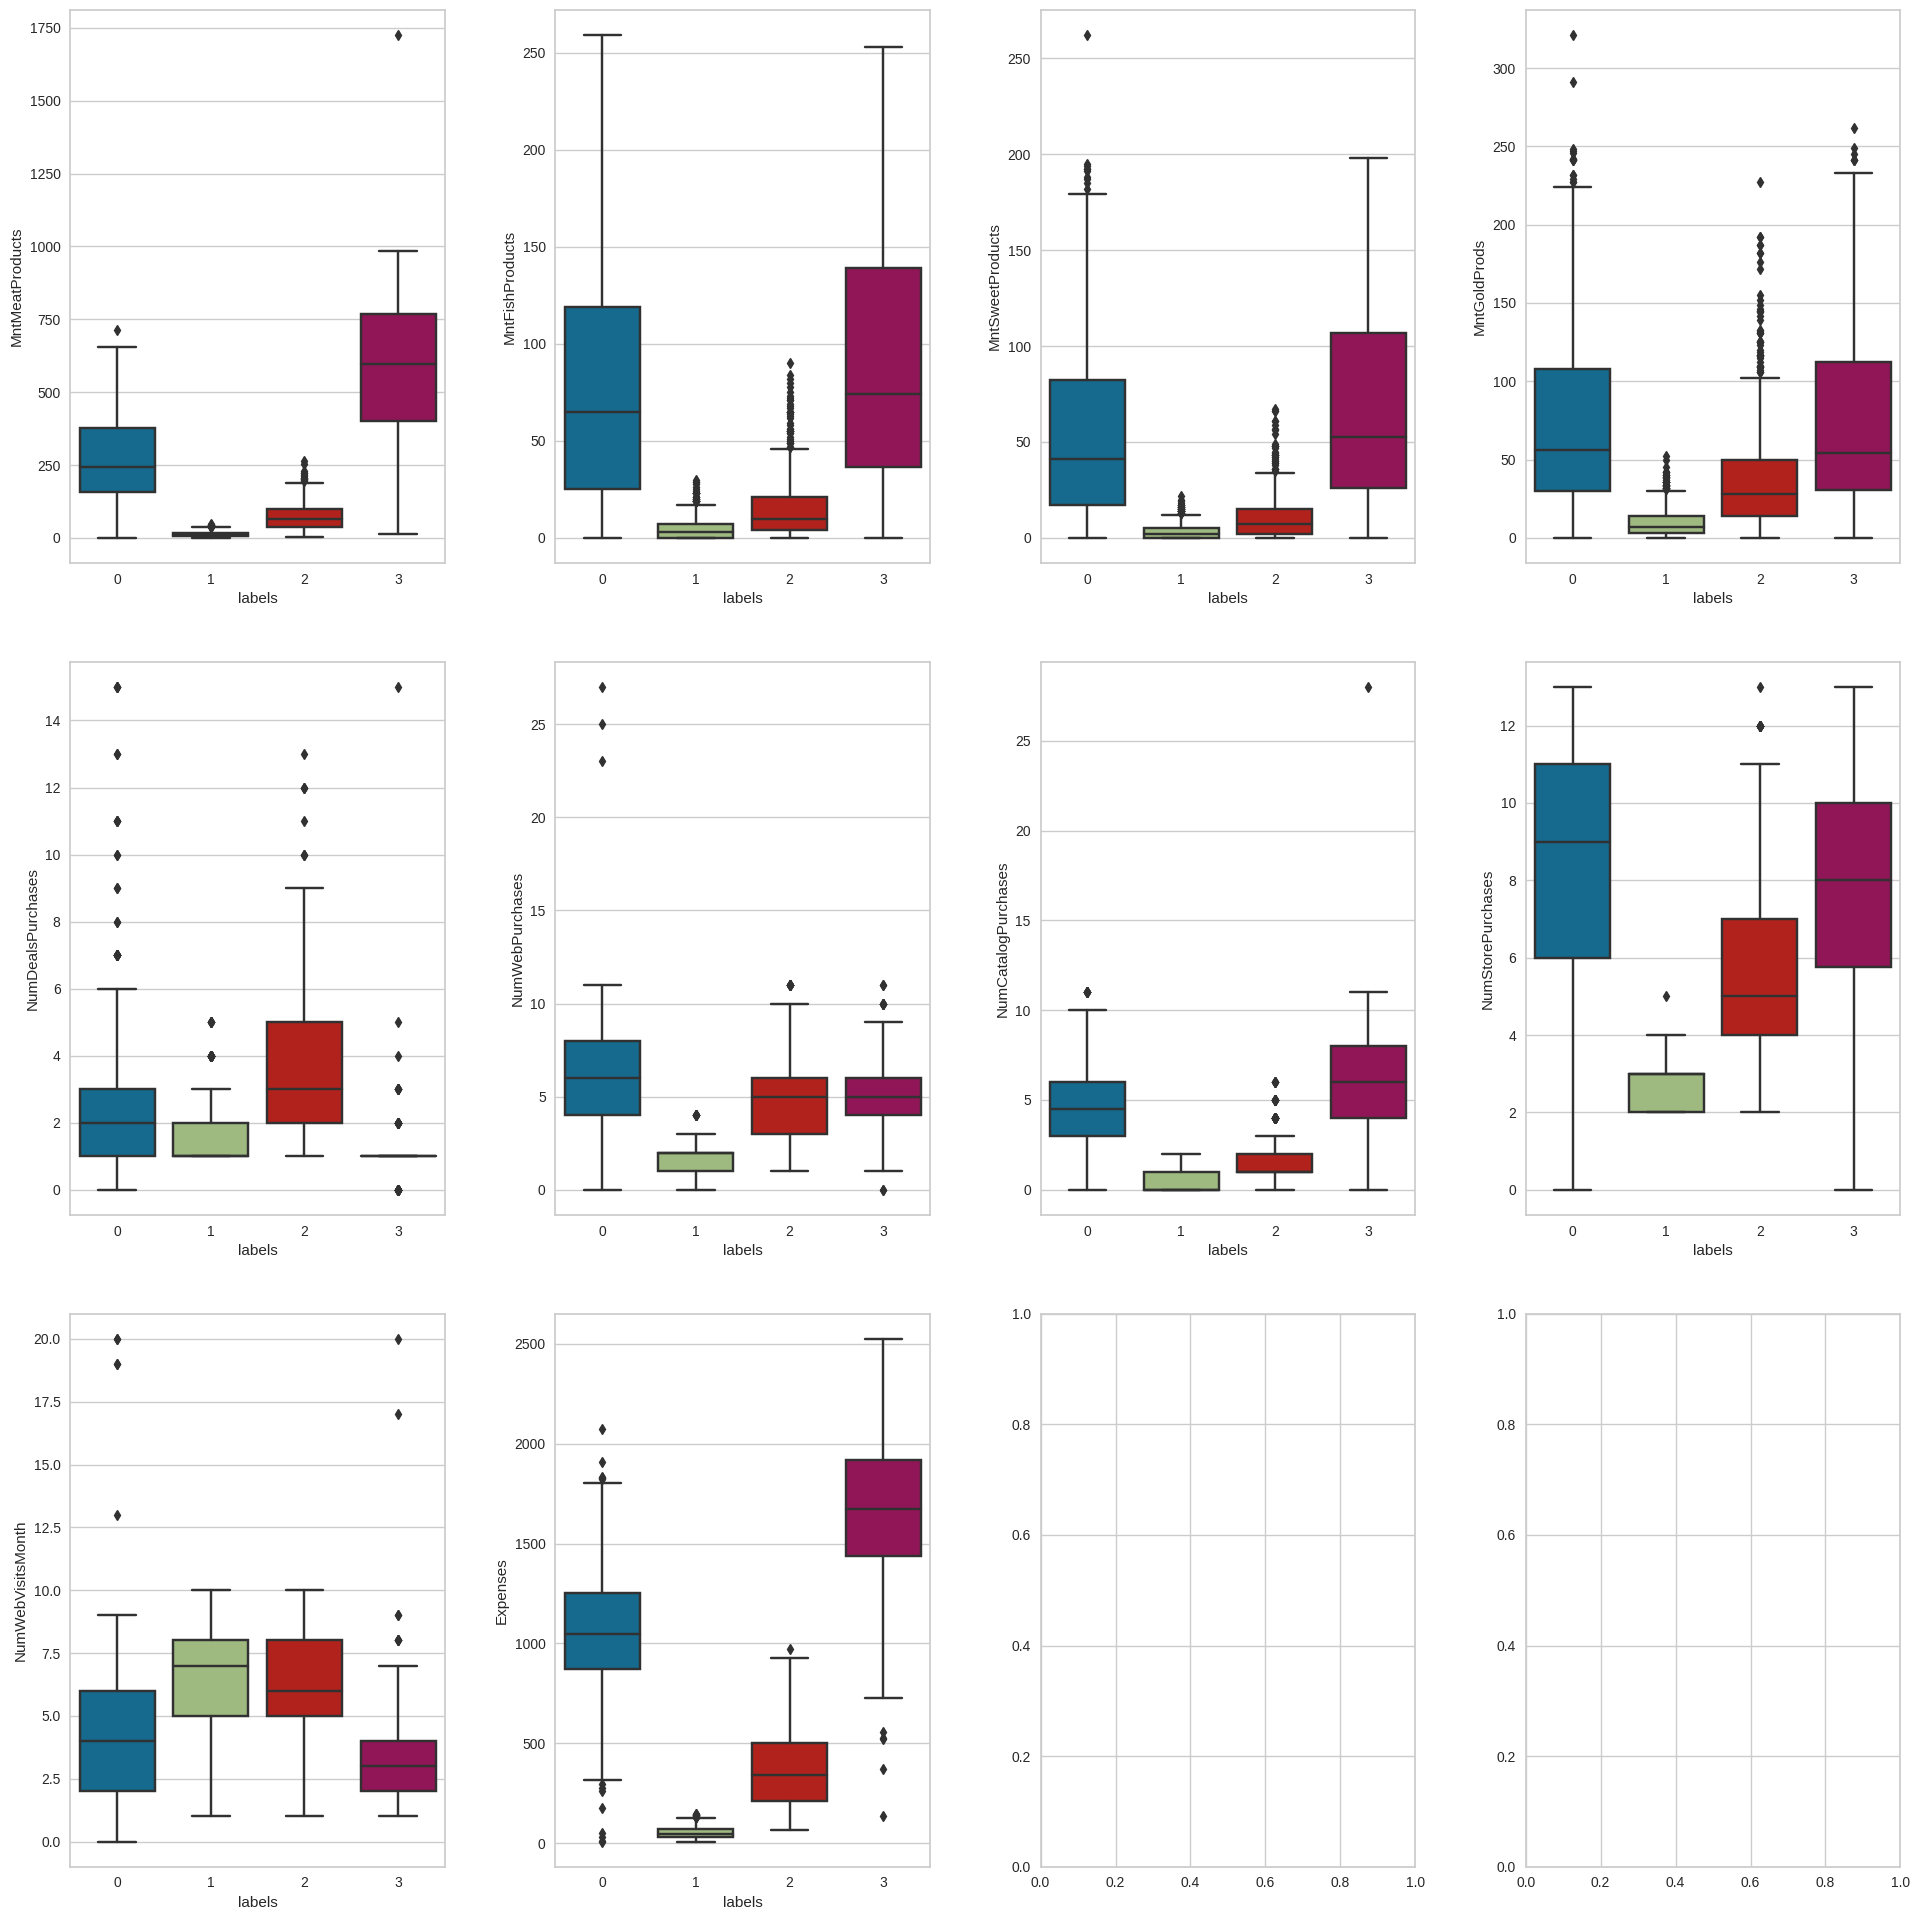

In [151]:
# Visualizing clustering in GMM using boxplots
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for i in range(3):
    for j in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[i][j],
                data = df5,
                y = df5.columns[3 + counter],
                x = 'labels',
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Cluster Profiling**

In [152]:
# Taking the cluster-wise mean of all the variables
gmm_cp = df5.groupby('labels').mean()

gmm_cp.T

labels                         0           1           2            3
Recency                48.326531   48.159892   50.806240    48.843284
MntWines              528.700680   20.054201  228.426929   784.705224
MntFruits              53.818027    2.972900   11.655172    64.477612
MntMeatProducts       268.828231   12.795393   72.221675   570.947761
MntFishProducts        78.023810    4.612466   15.807882    90.832090
MntSweetProducts       54.710884    3.170732   11.133005    69.134328
MntGoldProds           76.731293   10.097561   39.426929    76.727612
NumDealsPurchases       2.484694    1.764228    3.379310     1.085821
NumWebPurchases         5.894558    1.623306    4.940887     5.108209
NumCatalogPurchases     4.914966    0.307588    1.752053     6.152985
NumStorePurchases       8.673469    2.886179    5.737274     7.899254
NumWebVisitsMonth       4.238095    6.392954    6.067323     3.115672
Expenses             1060.812925   53.703252  378.671593  1656.824627
NumTotalPurchases      21.967687    6.581301   15.809524    20.246269
Engaged_in_days       564.290816  484.214092  555.776683   589.500000
TotalAcceptedCmp        0.346939    0.154472    0.274220     1.891791
AmountPerPurchase      49.634574    7.914013   22.706505    85.854684

In [153]:
# Highlighting max values to determine which label to cluster for
gmm_cp.style.highlight_max(color = "lightgreen", axis = 0)

In [154]:
# Creating the count column in gmm cluster profile to view cluster distribution
gmm_cp['count'] = df5.groupby('labels')['Expenses'].count().values

gmm_cp.T

labels                         0           1           2            3
Recency                48.326531   48.159892   50.806240    48.843284
MntWines              528.700680   20.054201  228.426929   784.705224
MntFruits              53.818027    2.972900   11.655172    64.477612
MntMeatProducts       268.828231   12.795393   72.221675   570.947761
MntFishProducts        78.023810    4.612466   15.807882    90.832090
MntSweetProducts       54.710884    3.170732   11.133005    69.134328
MntGoldProds           76.731293   10.097561   39.426929    76.727612
NumDealsPurchases       2.484694    1.764228    3.379310     1.085821
NumWebPurchases         5.894558    1.623306    4.940887     5.108209
NumCatalogPurchases     4.914966    0.307588    1.752053     6.152985
NumStorePurchases       8.673469    2.886179    5.737274     7.899254
NumWebVisitsMonth       4.238095    6.392954    6.067323     3.115672
Expenses             1060.812925   53.703252  378.671593  1656.824627
NumTotalPurchases      21.967687    6.581301   15.809524    20.246269
Engaged_in_days       564.290816  484.214092  555.776683   589.500000
TotalAcceptedCmp        0.346939    0.154472    0.274220     1.891791
AmountPerPurchase      49.634574    7.914013   22.706505    85.854684
count                 588.000000  738.000000  609.000000   268.000000

### **Characteristics of each cluster**

**Summary of each cluster:**

- **Cluster 0 (Moderate Spenders, Balanced Engagement)**: This cluster represents customers with moderate spending across various product categories. They exhibit a balanced level of engagement, with moderate purchases, web visits, and campaign acceptances.

- **Cluster 1 (Low Spenders, Low Engagement)**: Customers in this cluster have lower spending levels and engagement metrics compared to other clusters.

- **Cluster 2 (Mixed Spending, Moderate Engagement)**: This cluster includes customers with mixed spending patterns, showing a moderate level of engagement with various product categories.

- **Cluster 3 (High Spenders, Moderate Engagement)**: Customers in this cluster are characterized by high spending levels across different product categories. They also exhibit a moderate level of engagement with the company's offerings.

###**Model Comparisons**

In [155]:
models = [kmeans, kmedo, HCmodel, gmm]

for i in models:
  try:
    score = silhouette_score(data_pca, i.predict(data_pca))
  except:
    score = silhouette_score(data_pca, i.labels_)
  print(f"The {i} model's score is {score}.")

The KMeans(n_clusters=5, n_init='auto', random_state=1) model's score is 0.21594312973038293.
The KMedoids(n_clusters=5, random_state=1) model's score is 0.11933642807926274.
The AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3) model's score is 0.34507100753610304.
The GaussianMixture(n_components=4, random_state=1) model's score is 0.295833207618086.


## **Conclusion and Recommendations**

### **Comparison of Various Techniques**:

- **K-Means:**
  - **Performance:** Segmented customers into distinct clusters based on similarity.
  - **Insights:** Identified clear clusters with varying spending patterns and engagement levels.
  
- **K-Medoids:**
  - **Performance:** Similar to K-Means, but uses medoids instead of centroids.
  - **Insights:** Medoids-based clustering might provide more robustness to outliers.
  
- **Hierarchical Clustering:**
  - **Performance:** Captures hierarchical relationships between data points.
  - **Insights:** Reveals structure in the form of a dendrogram, providing a visual representation of data relationships.
  
- **Gaussian Mixture Model (GMM):**
  - **Performance:** Assumes that data is generated from a mixture of several Gaussian distributions.
  - **Insights:** Captures complex relationships between data points with probabilistic assignments.

**Relative Performance:**
- The choice of the "better" technique depends on the specific goals and characteristics of the data.
- K-Means and K-Medoids are good for non-hierarchical, well-separated clusters.
- Hierarchical Clustering is useful for understanding hierarchical relationships.
- GMM is suitable for capturing complex, overlapping clusters with probabilistic assignments.

**Scope for Improvement:**
- Experimentation with different distance metrics, linkage methods, or cluster initialization strategies might improve results.
- Feature engineering or additional data preprocessing might enhance cluster separation.
- Ensemble techniques or model stacking could combine the strengths of multiple models.

### **Refined Insights**:

- **Common Insights:**
  - **Cluster 0 (Moderate Spenders, Balanced Engagement):** Observed across multiple models, indicating a stable segment.
  - **Cluster 1 (Low Spenders, Low Engagement):** Identified consistently as a distinct segment.
  
- **Differences:**
  - **Medoids vs. Centroids:** K-Medoids might provide more robustness to outliers in certain scenarios.
  - **Hierarchical Structure:** Useful for visualizing hierarchical relationships in the data.
  - **Probabilistic Assignments:** GMM provides probability scores, offering a nuanced understanding of cluster membership.

### **Proposal for Final Solution Design**:

- **Final Model Proposal: Gaussian Mixture Model (GMM) or K-Means:**
  - **Why:**
    - GMM provides probabilistic cluster assignments, allowing for a nuanced understanding of data.
    - K-Means is computationally efficient and interpretable, suitable for well-separated clusters.
  - **Reasoning:**
    - If probabilistic cluster assignments are critical for understanding customer behavior, GMM might be preferred.
    - If interpretability and simplicity are priorities, K-Means could be the final choice.
  - **Potential Improvements:**
    - Fine-tune hyperparameters, such as the number of clusters, to optimize model performance.
    - Experiment with different initialization strategies or distance metrics to enhance cluster separation.

We also used silhouette score to provide valuable insights into the effectiveness of each model. Here are the silhouette scores for different clustering techniques:

- The KMeans model with five clusters (n_clusters = 5, n_init = 'auto', random_state = 1) achieves a silhouette score of 0.2159, indicating a moderate level of cluster separation and cohesion.

- The KMedoids model with five clusters (n_clusters = 5, random_state = 1) yields a silhouette score of 0.1193, suggesting lower cluster separation compared to KMeans.

- The AgglomerativeClustering model with three clusters (linkage='average', metric = 'euclidean', n_clusters = 3) demonstrates a silhouette score of 0.3451, signifying a relatively strong separation and cohesion among clusters.

- The GaussianMixture model with four components (n_components = 4, random_state = 1) achieves a silhouette score of 0.2958, indicating a moderate level of cluster separation and cohesion.

The AgglomerativeClustering model, with an average linkage method and three clusters, stands out with the highest silhouette score among the models presented. However, the choice of the most suitable model also depends on other factors, such as the interpretability of the clusters and the business context. When considering interpretability, K-Means stands out substantially.

**Final Considerations:**
- The choice between GMM and K-Means depends on the level of interpretability and the need for probabilistic assignments.
- Model performance can be further enhanced through hyperparameter tuning and iterative experimentation.
- Regular model evaluation and validation against new data are crucial for maintaining the effectiveness of the clustering solution.

###**Proposed Business Decisions**:

1. Focus on your outlier groups, low spenders with low engagement and high spenders with high engagement. Analyze their behavior, and get to the "Why" of their actions. There appears to be a correlation between family size and income, so there's a strong chance that we're failing to meet the needs of larger and lower income families--a massive blind spot worth digging into. Get to know your high spenders to understand how you can both scale their engagement to other products while also replicating what's working to other segments.

2. Focus on timing discounts with correspondense, as there is a clear positive correlation between campaign engagement and deal purchases on the platform. For an entire segment of customers, there appeared to be a correlation between there being available discounts and purchasing behavior. This could either be reflective of our pricing model or of our discount offering cadence.

3. It is prudent that we experiment with offering discounts on different timelines. On average, people spent on monthly cycle, indicating that we aren't anyone's primary source of food, especially given that people will typically take weekly or biweekly trips to the grocery store. It's unclear of whether they aren't aware of our discounts or whether we aren't doing our part in raising customer awareness. In many lower spenders, their correspondense rate is low, so maybe the information we're sharing isn't relevant to them.

4. If possible, we should interview sample groups within each cluster to gain some qualitative insights and context into our quantiative analysis. Without that context, we cannot fully validate the efficacy of our segmentation model.



###**Recommendations for Implementation**

Implementing either of the proposed models entails careful consideration of several factors to ensure the success and sustainability of the solution. Here are recommendations for the data team, taking into account cost/benefits, risks/challenges, and future considerations:

1. **Model Implementation and Validation:**
   - **Recommendation:** Begin with the implementation of the selected models, such as Gaussian Mixture Model (GMM) or K-Means, based on the identified business priorities and interpretability requirements.
   - **Cost/Benefit Analysis:** Assess the computational cost of each model against its benefits in terms of improved customer segmentation, marketing efficiency, and ROI.
   - **Risk/Challenge:** Ensure thorough model validation using relevant metrics and consider potential challenges such as overfitting or underfitting. Rigorous testing and validation are crucial before deploying the model in a production environment.

2. **Hyperparameter Tuning and Optimization:**
   - **Recommendation:** Conduct iterative hyperparameter tuning to optimize the performance of the chosen model. Experiment with different cluster numbers, initialization strategies, and distance metrics.
   - **Cost/Benefit Analysis:** While hyperparameter tuning incurs additional computational costs, the benefits include improved model accuracy and the potential for enhanced business insights.
   - **Risk/Challenge:** Over-tuning may lead to overfitting, impacting the model's generalization ability. Strike a balance between performance improvement and avoiding overfitting.

3. **Scalability and Infrastructure:**
   - **Recommendation:** Design the solution with scalability in mind to accommodate growing data volumes and evolving business needs. Leverage scalable infrastructure and distributed computing if necessary.
   - **Cost/Benefit Analysis:** Upfront investments in scalable infrastructure may incur costs, but the long-term benefits include the ability to handle increased data loads and sustained model performance.
   - **Risk/Challenge:** Failure to anticipate scalability needs may result in performance bottlenecks, hindering the effectiveness of the solution over time.

4. **Communication and Collaboration:**
   - **Recommendation:** Foster strong cross-functional communication between the data team, business stakeholders, and other relevant departments. Clearly articulate the value proposition of the implemented models and gather feedback for continuous improvement.
   - **Cost/Benefit Analysis:** Communication efforts incur minimal direct costs but contribute significantly to the success of the project by ensuring alignment with business objectives.
   - **Risk/Challenge:** Lack of communication and collaboration may lead to misalignment between technical implementations and business expectations, potentially impacting the adoption and success of the solution.

5. **Monitoring and Maintenance:**
   - **Recommendation:** Establish robust monitoring mechanisms to track the performance of the implemented models over time. Implement a maintenance plan for periodic updates and model retraining.
   - **Cost/Benefit Analysis:** Ongoing monitoring and maintenance incur costs but are essential for ensuring the longevity and relevance of the solution.
   - **Risk/Challenge:** Neglecting monitoring and maintenance may lead to model degradation over time, compromising the quality of customer segmentation and insights.

6. **Ethical and Privacy Considerations:**
   - **Recommendation:** Prioritize ethical considerations, especially regarding customer data privacy. Implement safeguards to ensure compliance with relevant data protection regulations.
   - **Cost/Benefit Analysis:** The cost of implementing robust ethical and privacy measures is justified by the benefits of maintaining trust with customers and avoiding potential legal issues.
   - **Risk/Challenge:** Ignoring ethical and privacy considerations poses significant risks, including reputational damage and legal consequences.

7. **Documentation and Knowledge Transfer:**
   - **Recommendation:** Document the entire implementation process, including model architectures, hyperparameters, and validation procedures. Facilitate knowledge transfer to ensure the sustainability of the solution.
   - **Cost/Benefit Analysis:** The upfront cost of documentation and knowledge transfer is outweighed by the long-term benefits of maintaining a well-documented and transferable solution.
   - **Risk/Challenge:** Lack of documentation and knowledge transfer may lead to knowledge silos, making it challenging for future teams to understand and maintain the implemented solution.

8. **Future Considerations and Innovation:**
   - **Recommendation:** Stay abreast of advancements in Unsupervised Learning and clustering techniques. Allocate resources for continuous innovation to leverage emerging technologies and methodologies.
   - **Cost/Benefit Analysis:** While investing in ongoing innovation incurs costs, the benefits include staying competitive, adapting to changing business dynamics, and uncovering new opportunities.
   - **Risk/Challenge:** Failing to adapt to evolving technologies may result in the solution becoming outdated, limiting its effectiveness in addressing future business challenges.

By addressing these aspects comprehensively, the data team can create a robust, scalable, and ethically sound solution that delivers sustained value to stakeholders.

In [ ]:
!jupyter nbconvert --to html '/content/Capstone_Project.ipynb'

[NbConvertApp] Converting notebook /content/Capstone_Project.ipynb to html
[NbConvertApp] Writing 5882343 bytes to /content/Capstone_Project.html
